## **FINANCAL MODELING**

**1. Chargement des modules nécessaires**

In [44]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco
import yfinance as yf
from datetime import datetime
# Automatisations
import schedule
import time

**2. Collecte des données**

   **a. Selection des 40 meuilleures capitalisation de CAC40** 

In [2]:
# Collectte des Tickers
url = "https://en.wikipedia.org/wiki/CAC_40"
cac40 = pd.read_html(url)[4]
tickers = cac40["Ticker"].to_list()
info_tickers = cac40[[ "Ticker", "Company", "Sector"]]
print(f"Les informations sur les entreprises du CAC40 sont : \n{info_tickers}")

Les informations sur les entreprises du CAC40 sont : 
      Ticker                    Company                  Sector
0      AC.PA                      Accor       Consumer Services
1      AI.PA                Air Liquide         Basic Materials
2     AIR.PA                     Airbus             Industrials
3      MT.AS              ArcelorMittal         Basic Materials
4      CS.PA                        Axa      Financial Services
5     BNP.PA                BNP Paribas      Financial Services
6      EN.PA                   Bouygues             Industrials
7     CAP.PA                  Capgemini              Technology
8      CA.PA                  Carrefour      Consumer Defensive
9     ACA.PA            Crédit Agricole      Financial Services
10     BN.PA                     Danone      Consumer Defensive
11    DSY.PA          Dassault Systèmes              Technology
12   EDEN.PA                    Edenred             Industrials
13   ENGI.PA                      Engie           

**b. Collecte du prix à la cloture**

In [3]:
# Collecte des données
start = datetime(2020,1,1)
end = datetime.now()
cac40_data = yf.download(tickers=tickers, start=start, end=end)["Close"]
cac40_data.head(5)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  40 of 40 completed


Ticker          AC.PA    ACA.PA      AI.PA      AIR.PA      BN.PA     BNP.PA  \
Date                                                                           
2020-01-02  40.105446  9.573108  95.134506  128.357147  62.225372  37.128826   
2020-01-03  39.577240  9.515021  94.834167  128.857025  62.763680  36.685329   
2020-01-06  38.655277  9.420636  94.195930  128.299454  62.881443  36.505161   
2020-01-07  38.751312  9.398853  93.782944  126.895905  62.292648  36.491299   
2020-01-08  38.799335  9.442416  93.858032  129.183884  61.030991  36.574459   

Ticker          CA.PA      CAP.PA      CS.PA      DG.PA  ...     SAN.PA  \
Date                                                     ...              
2020-01-02  12.773987  102.722443  19.155064  83.949806  ...  74.554527   
2020-01-03  12.825184  102.814949  19.162586  83.428497  ...  75.017288   
2020-01-06  12.825184  101.103676  18.910547  83.008064  ...  75.488319   
2020-01-07  12.927581  101.149925  19.027161  82.436302  ...  75.223885   
2020-01-08  12.944649  100.872421  19.019638  84.017082  ...  75.480042   

Ticker         SGO.PA  STLAP.PA   STMPA.PA      SU.PA      TEP.PA     TTE.PA  \
Date                                                                           
2020-01-02  32.953613  3.626625  23.870201  83.409286  195.199768  35.638069   
2020-01-03  32.378918  3.626625  23.667984  83.194176  195.378326  36.042274   
2020-01-06  32.075977  3.626625  23.138399  83.086617  194.663971  36.564209   
2020-01-07  31.946781  3.626625  23.716133  82.746017  195.199768  36.324993   
2020-01-08  31.986876  3.626625  23.687244  82.961128  198.592987  36.419224   

Ticker      URW.PA     VIE.PA    VIV.PA  
Date                                     
2020-01-02     NaN  19.276802  8.635486  
2020-01-03     NaN  19.373466  8.655224  
2020-01-06     NaN  19.260691  8.513766  
2020-01-07     NaN  19.091524  8.503898  
2020-01-08     NaN  18.994860  8.471001  

[5 rows x 40 columns]

**3. Analyse exploratoire des données**

In [4]:
# Analyse de la dimension des données
print("Analyse de la dimension des données :\n")
print(f"Les nombres de lignes est de : {cac40_data.shape[0]} \n")
print(f"Le nombre de colonne est de :  {cac40_data.shape[1]} \n")

Analyse de la dimension des données :

Les nombres de lignes est de : 1329 

Le nombre de colonne est de :  40 



In [5]:
# Cherche de valeurs manquantes
print(f"Données avant gestion des valeurs manquantes : \n")
print(cac40_data.isnull().sum())


# Gestion des valeurs manquantes ou missing values
cac40_data.drop(columns="URW.PA", axis=1, inplace=True)
print(f"Données après gestions des VM \n")
print(cac40_data.isnull().sum())

Données avant gestion des valeurs manquantes : 

Ticker
AC.PA         0
ACA.PA        0
AI.PA         0
AIR.PA        0
BN.PA         0
BNP.PA        0
CA.PA         0
CAP.PA        0
CS.PA         0
DG.PA         0
DSY.PA        0
EDEN.PA       0
EL.PA         0
EN.PA         0
ENGI.PA       0
ERF.PA        0
GLE.PA        0
HO.PA         0
KER.PA        0
LR.PA         0
MC.PA         0
ML.PA         0
MT.AS         0
OR.PA         0
ORA.PA        0
PUB.PA        0
RI.PA         0
RMS.PA        0
RNO.PA        0
SAF.PA        0
SAN.PA        0
SGO.PA        0
STLAP.PA      0
STMPA.PA      0
SU.PA         0
TEP.PA        0
TTE.PA        0
URW.PA      844
VIE.PA        0
VIV.PA        0
dtype: int64
Données après gestions des VM 

Ticker
AC.PA       0
ACA.PA      0
AI.PA       0
AIR.PA      0
BN.PA       0
BNP.PA      0
CA.PA       0
CAP.PA      0
CS.PA       0
DG.PA       0
DSY.PA      0
EDEN.PA     0
EL.PA       0
EN.PA       0
ENGI.PA     0
ERF.PA      0
GLE.PA      0
HO.PA       0


In [6]:
# Analyse descriptives des actifs
print(f"Analyse descriptive des actifs")
cac40_data.describe().T

Analyse descriptive des actifs


count         mean         std         min         25%  \
Ticker                                                              
AC.PA     1329.0    31.061872    6.597255   19.899063   26.487268   
ACA.PA    1329.0     9.643278    2.611507    4.369432    7.828506   
AI.PA     1329.0   128.000952   25.117673   74.500755  107.770012   
AIR.PA    1329.0   112.196057   28.395113   47.167782   95.093292   
BN.PA     1329.0    53.357230    5.905306   40.783173   48.980347   
BNP.PA    1329.0    46.268740   12.334437   17.095337   39.138802   
CA.PA     1329.0    14.486672    1.656564   10.516994   13.299758   
CAP.PA    1329.0   157.102119   35.553066   53.114117  141.722015   
CS.PA     1329.0    22.982204    6.913644    9.399975   18.289850   
DG.PA     1329.0    88.689711   14.666820   47.928074   78.039856   
DSY.PA    1329.0    37.028360    5.916763   21.150547   33.150002   
EDEN.PA   1329.0    43.873078    7.267253   28.170000   38.639988   
EL.PA     1329.0   157.413976   39.480779   85.370842  128.393890   
EN.PA     1329.0    28.323192    3.291434   17.722338   26.481192   
ENGI.PA   1329.0    11.382469    2.582780    6.434699    9.174884   
ERF.PA    1329.0    66.080221   17.681936   37.932007   53.554047   
GLE.PA    1329.0    20.831152    5.204630    8.961896   18.846771   
HO.PA     1329.0   107.452311   33.632115   50.129257   76.013664   
KER.PA    1329.0   459.618628  117.762786  206.616669  387.354065   
LR.PA     1329.0    80.135204   13.486446   44.424171   69.393082   
MC.PA     1329.0   612.430651  143.557006  267.396973  534.093506   
ML.PA     1329.0    27.449648    4.913246   15.127179   23.950975   
MT.AS     1329.0    21.394802    5.723742    6.054872   20.020493   
OR.PA     1329.0   344.700345   60.412341  191.168564  301.393097   
ORA.PA    1329.0     8.800575    1.064217    6.425509    7.835804   
PUB.PA    1329.0    58.060131   25.960650   16.253557   41.087036   
RI.PA     1329.0   152.738126   25.900784   97.000000  129.691360   
RMS.PA    1329.0  1456.230292  562.854709  509.397339  981.073853   
RNO.PA    1329.0    32.914997    8.254341   13.896366   27.940767   
SAF.PA    1329.0   134.580764   43.906599   51.654900  102.869095   
SAN.PA    1329.0    83.218305    9.842733   59.539509   75.500237   
SGO.PA    1329.0    52.018573   17.677772   15.982747   38.470364   
STLAP.PA  1329.0    12.107839    5.191218    3.626625   10.693386   
STMPA.PA  1329.0    33.573058    7.316938   13.472259   27.190653   
SU.PA     1329.0   148.078226   48.016566   60.302784  115.885300   
TEP.PA    1329.0   207.946092   83.684091   80.080002  121.440804   
TTE.PA    1329.0    43.428730   13.069318   15.799300   30.806929   
VIE.PA    1329.0    23.623148    4.600152   13.109076   20.505756   
VIV.PA    1329.0     8.977548    1.795608    1.816810    8.260459   

                  50%          75%          max  
Ticker                                           
AC.PA       30.011860    33.810417    50.459999  
ACA.PA       9.359613    10.971296    16.580000  
AI.PA      119.841942   150.041016   180.919998  
AIR.PA     110.480629   131.491074   174.380005  
BN.PA       52.054249    57.060951    72.339996  
BNP.PA      46.177559    55.829861    77.169998  
CA.PA       14.720167    15.606474    18.880699  
CAP.PA     164.713089   181.584641   223.129745  
CS.PA       21.862164    26.906042    38.650002  
DG.PA       85.464355   101.150002   118.849998  
DSY.PA      36.572365    40.459232    55.351994  
EDEN.PA     43.794212    48.655895    60.507473  
EL.PA      156.256454   173.330231   295.799988  
EN.PA       28.190001    30.219999    36.660000  
ENGI.PA     10.738558    13.665205    17.389999  
ERF.PA      60.515282    76.673302   121.239822  
GLE.PA      21.660000    23.844999    42.014999  
HO.PA      111.804741   134.077133   247.199997  
KER.PA     475.428406   529.785583   718.989929  
LR.PA       81.554832    89.797768   110.699997  
MC.PA      632.256958   702.400024   871.436707  
ML.PA       27.279108    31.010

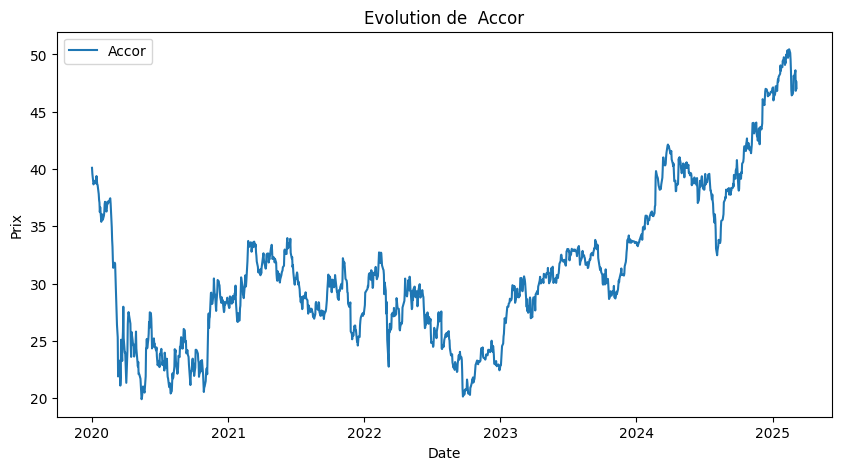

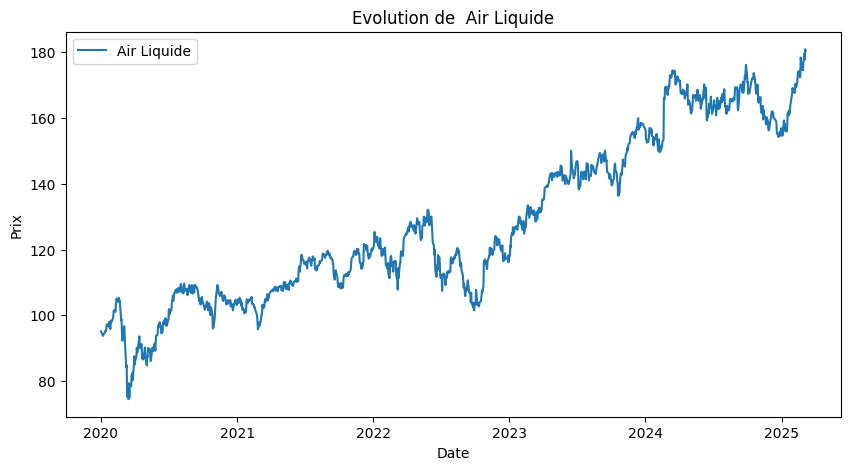

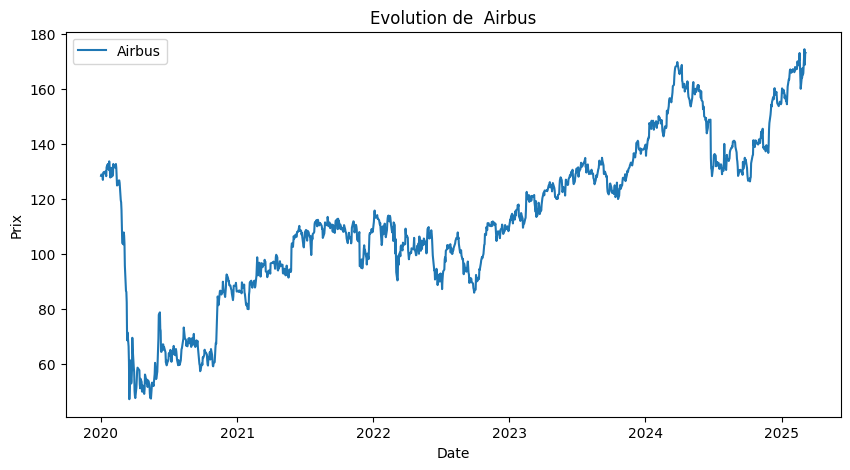

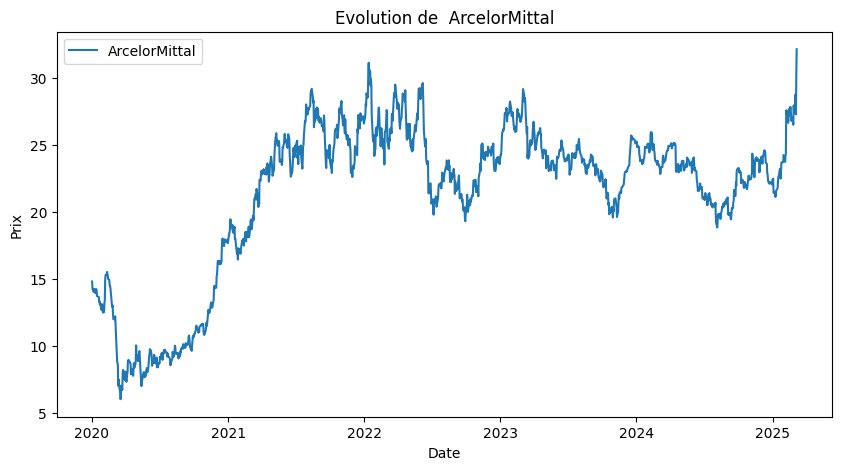

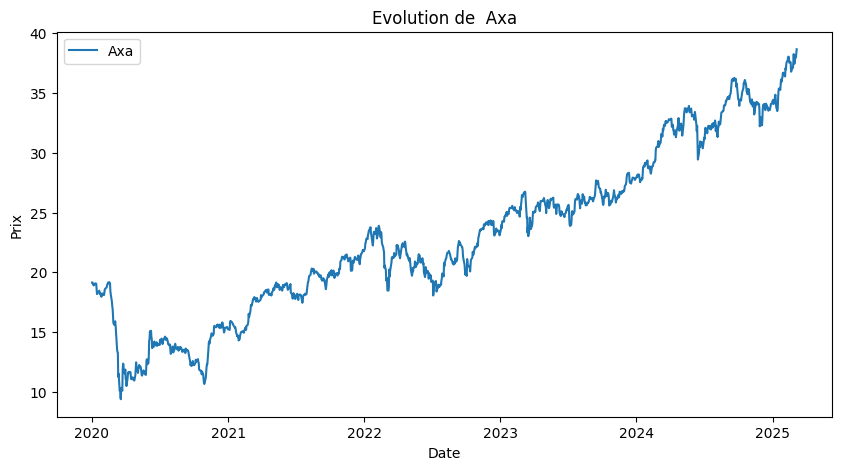

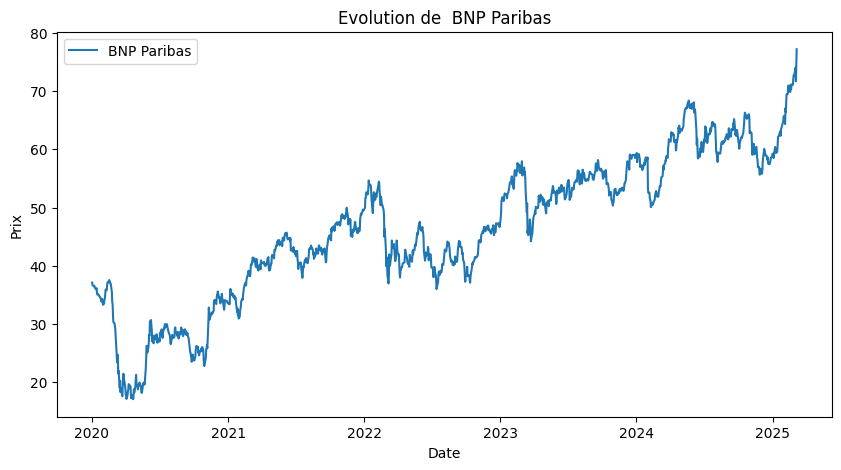

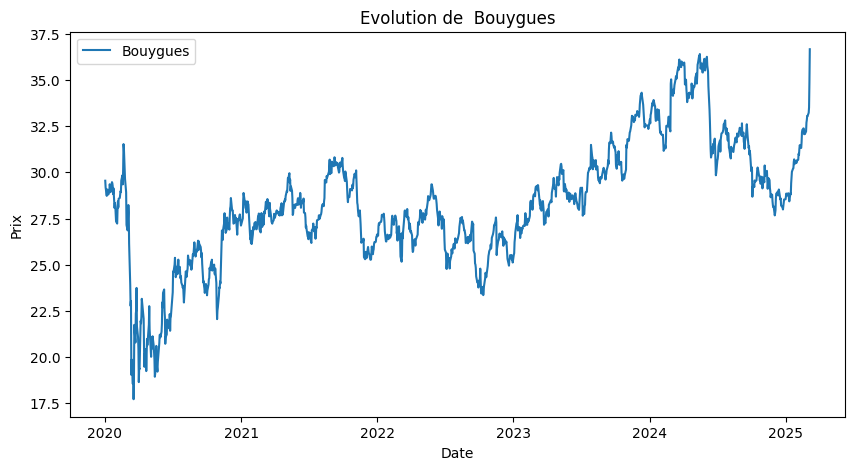

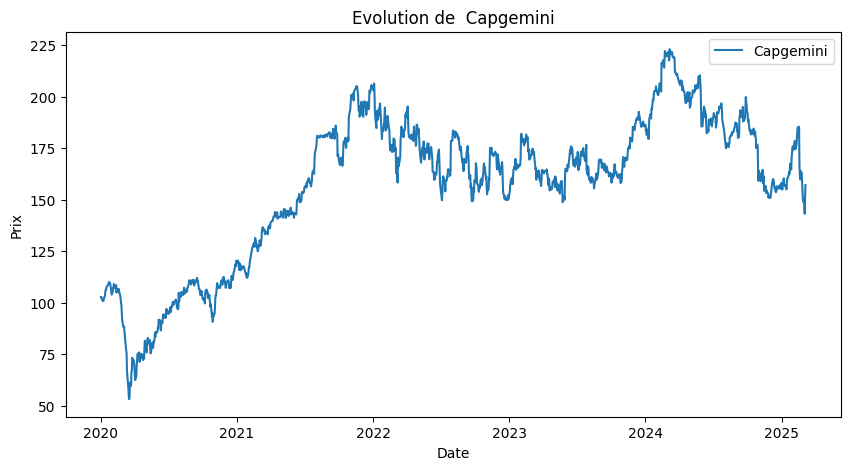

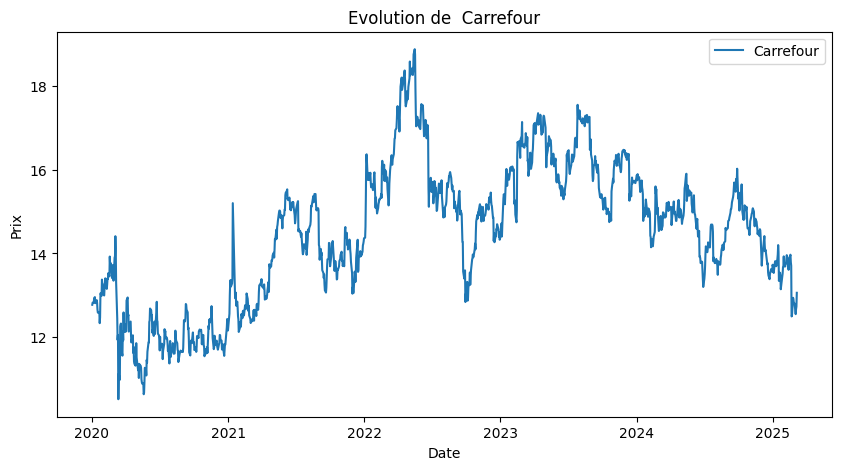

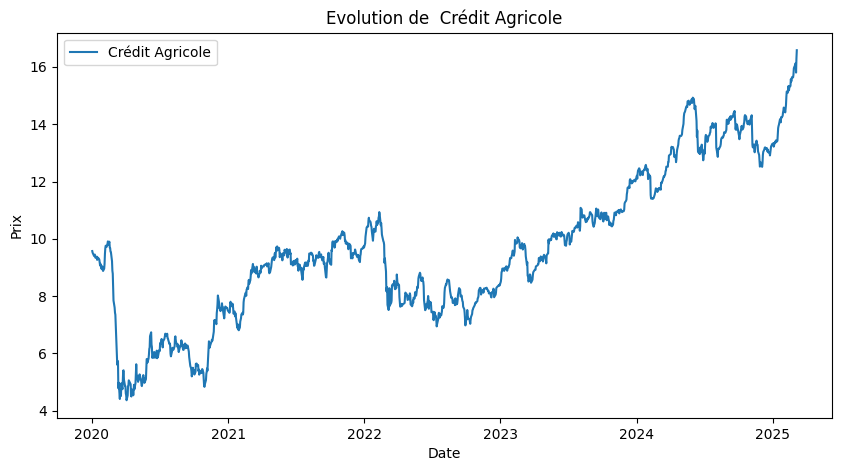

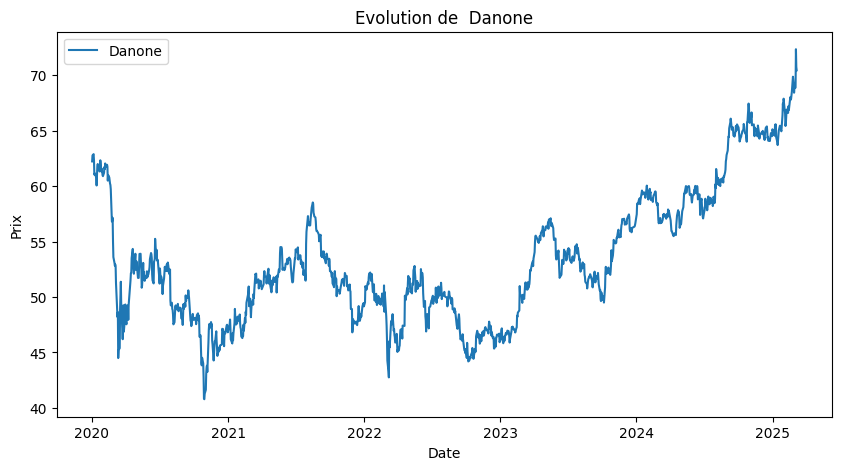

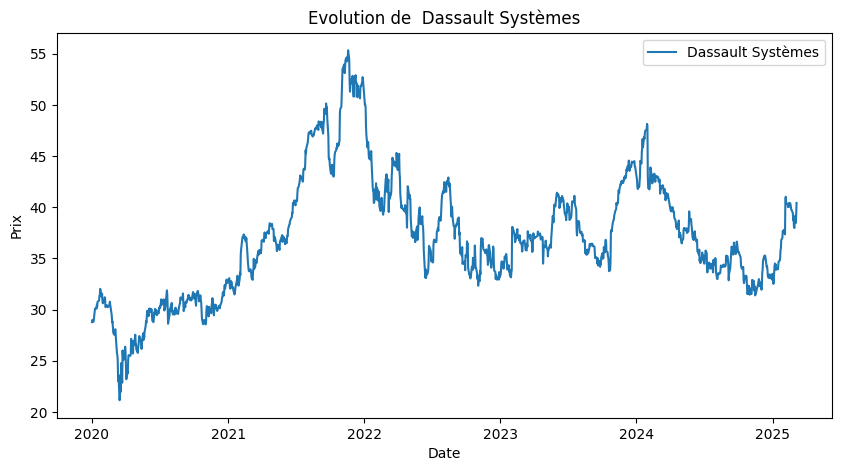

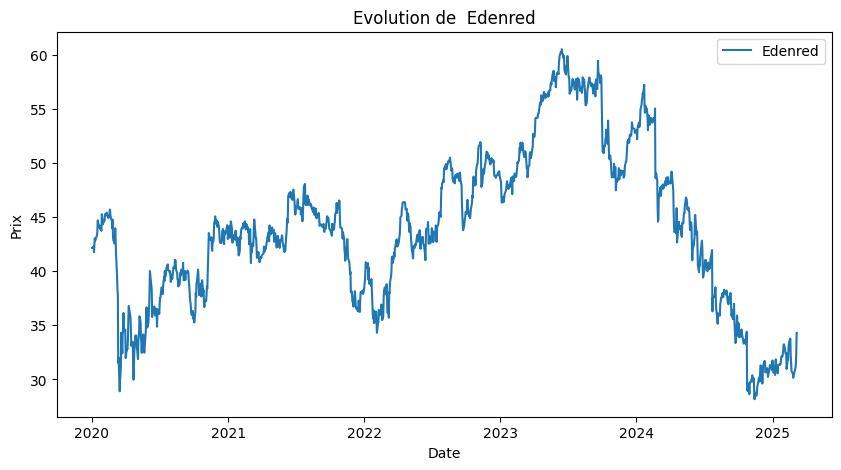

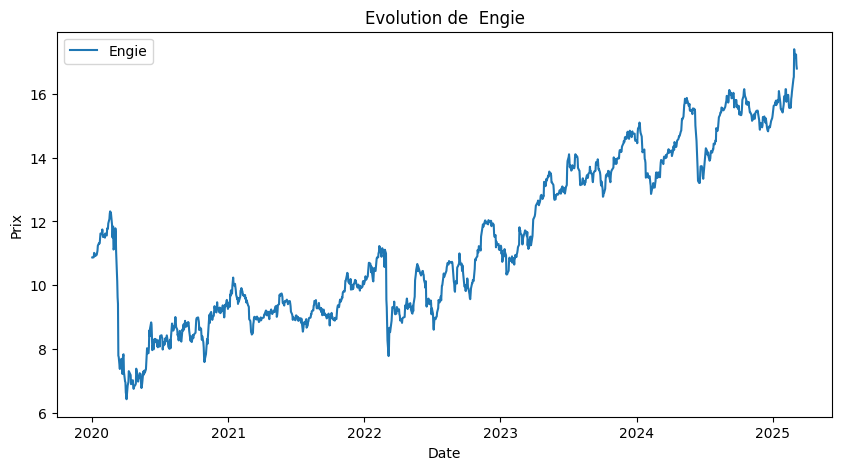

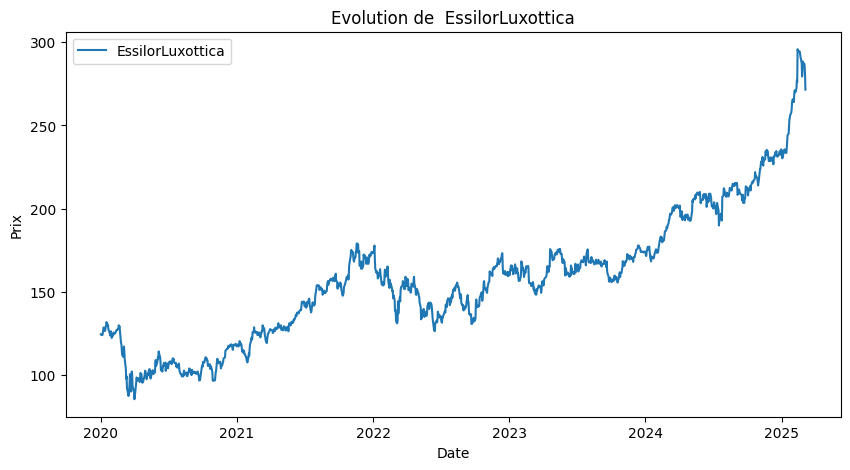

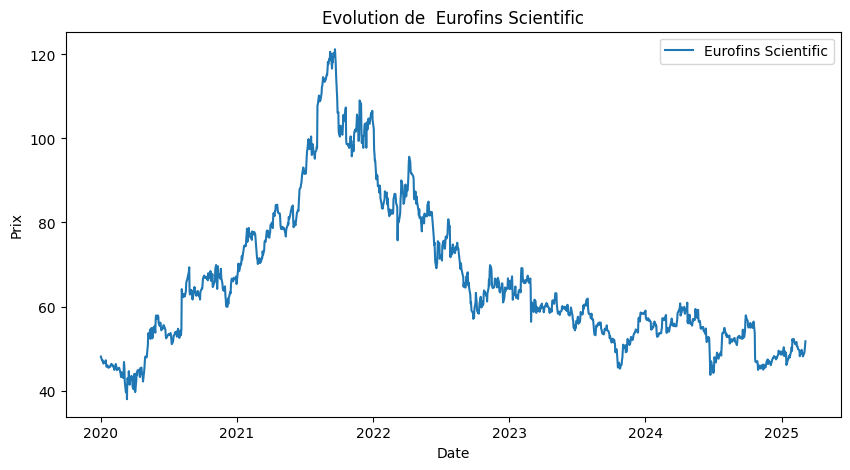

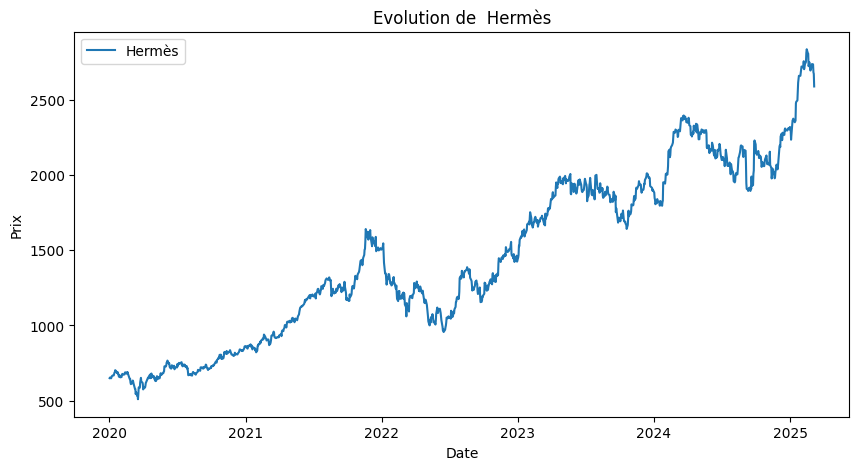

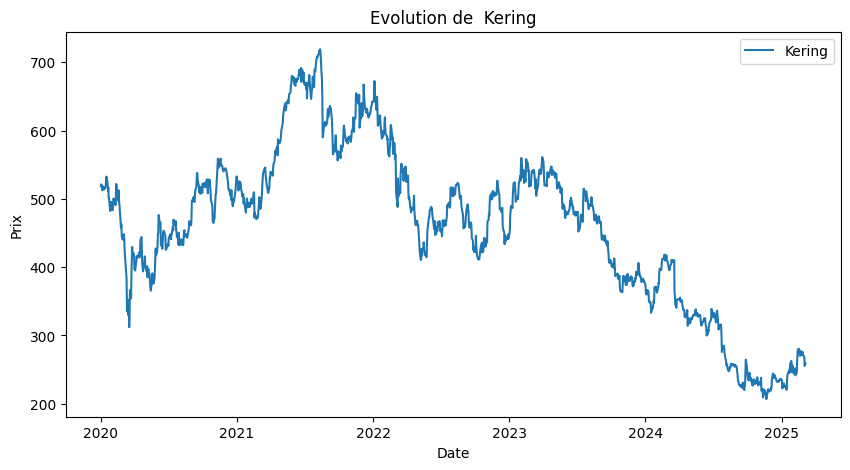

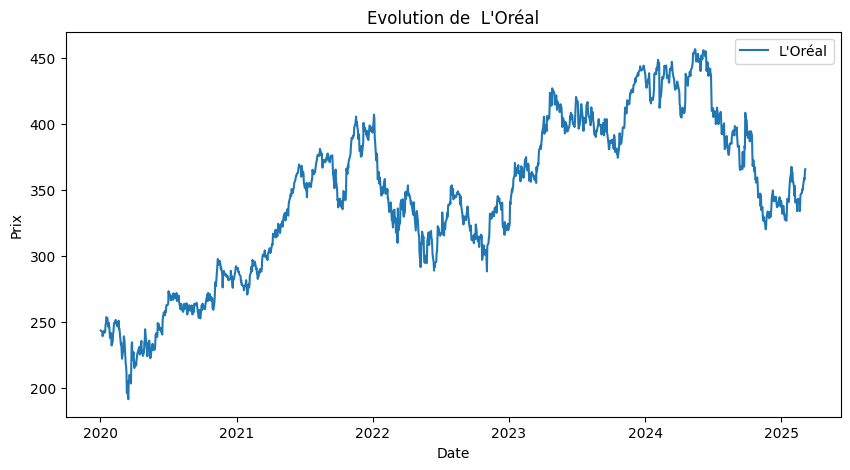

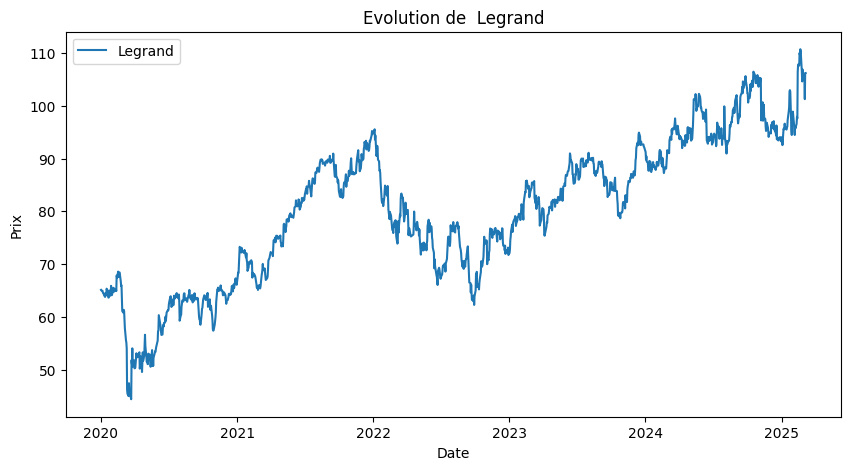

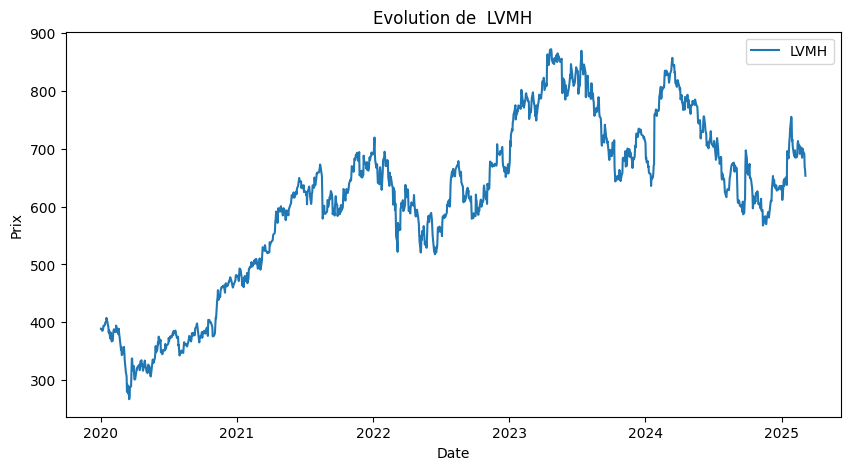

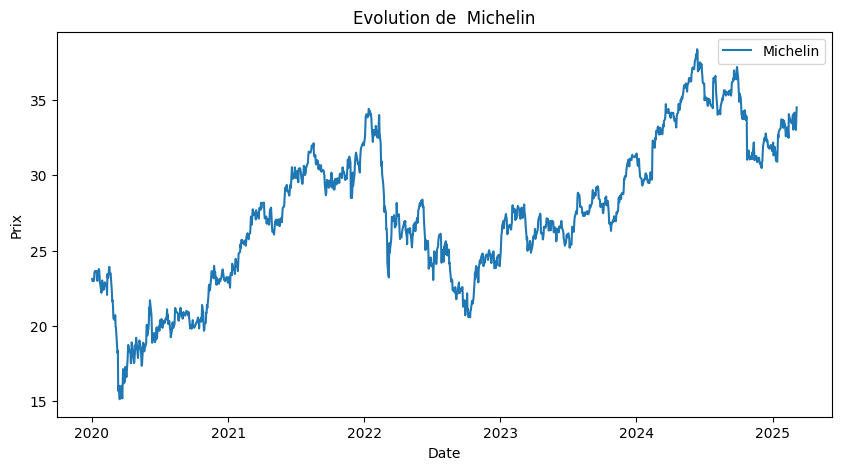

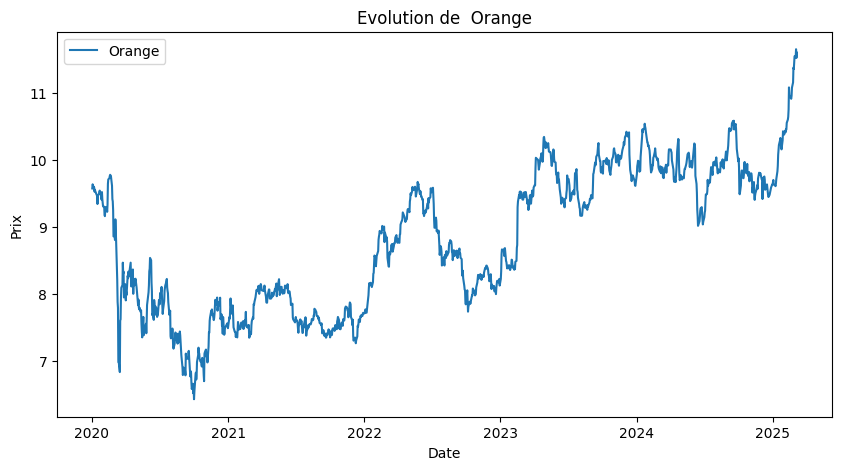

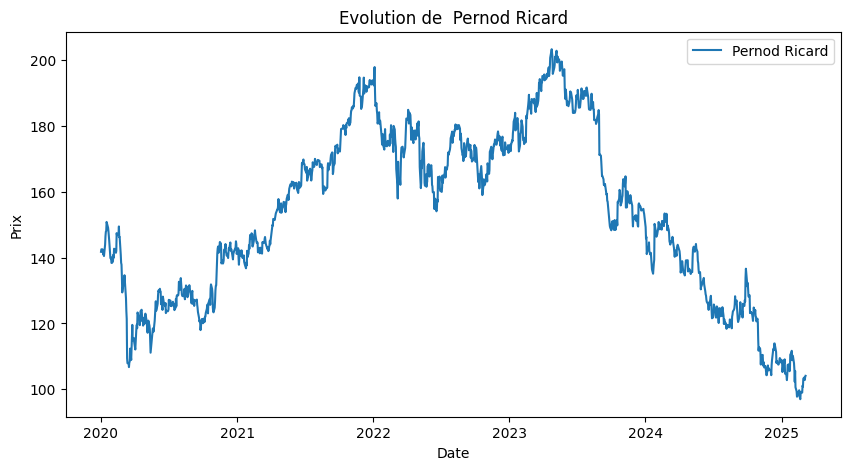

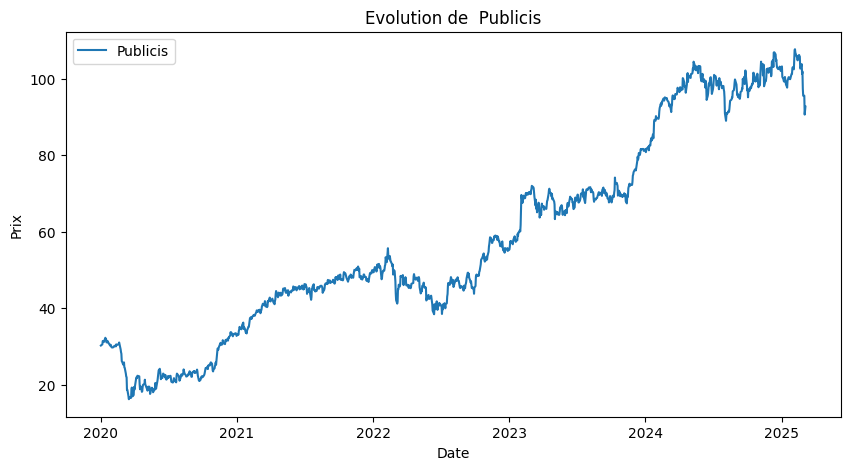

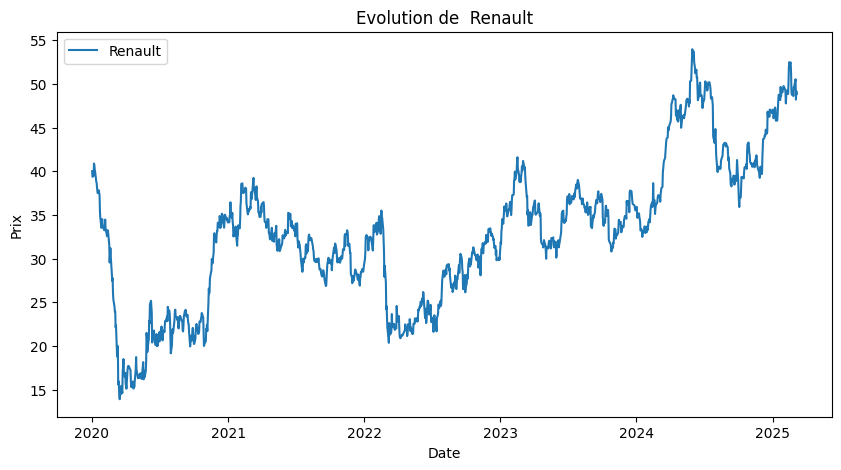

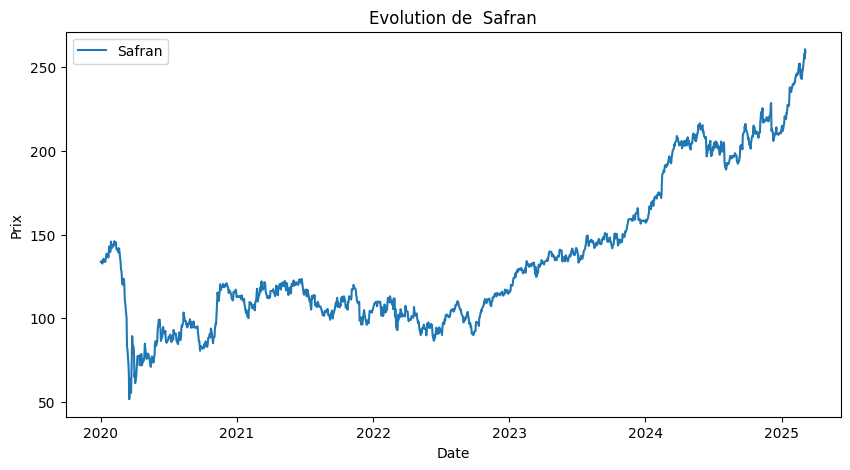

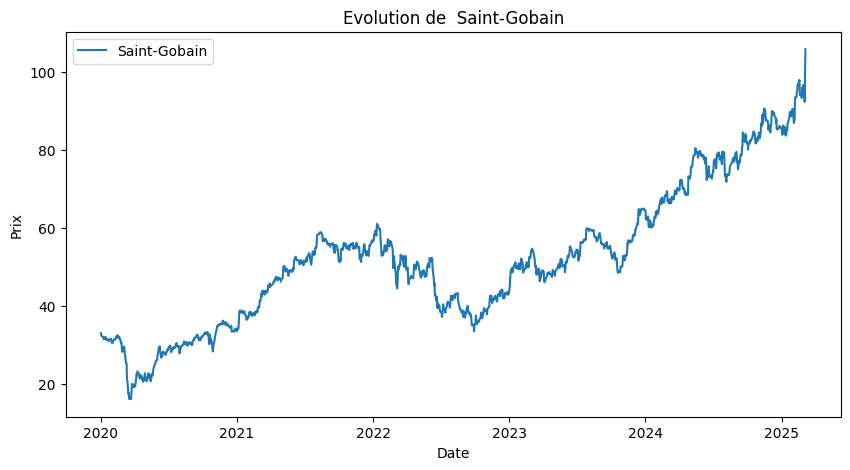

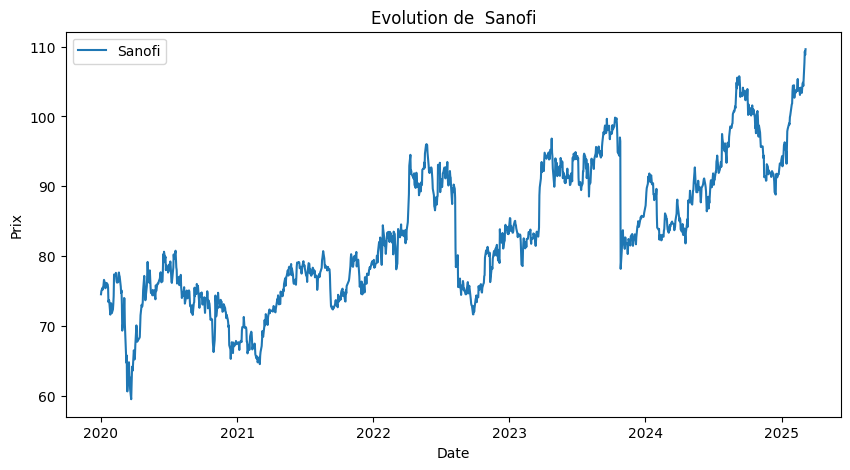

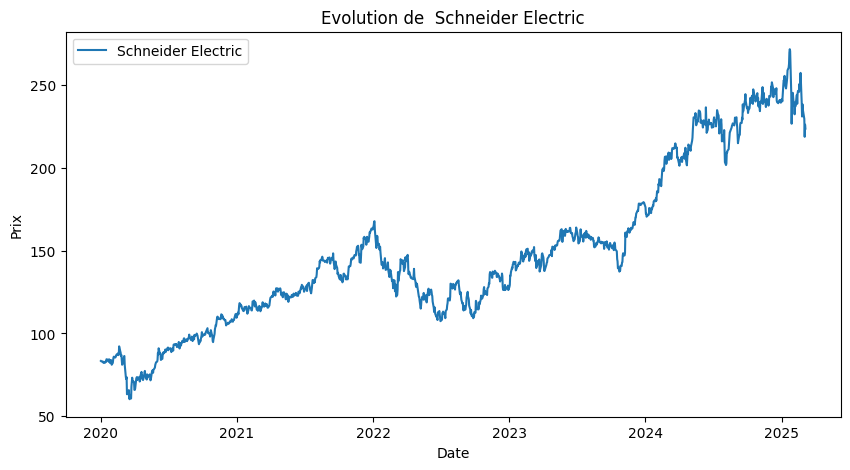

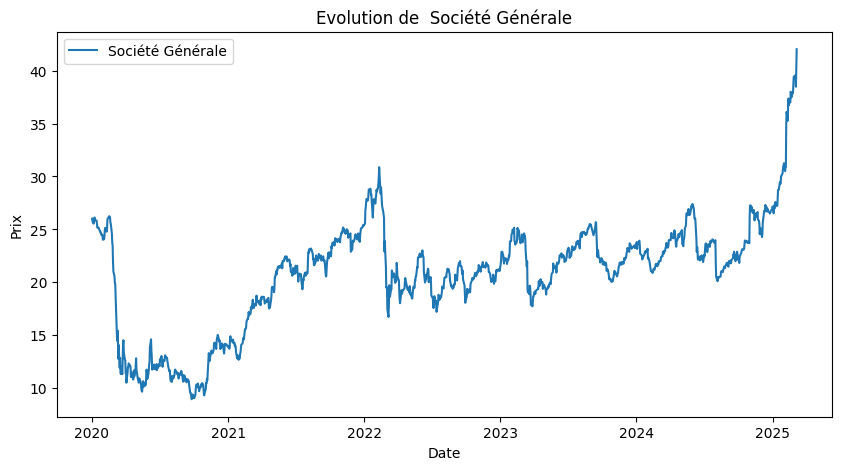

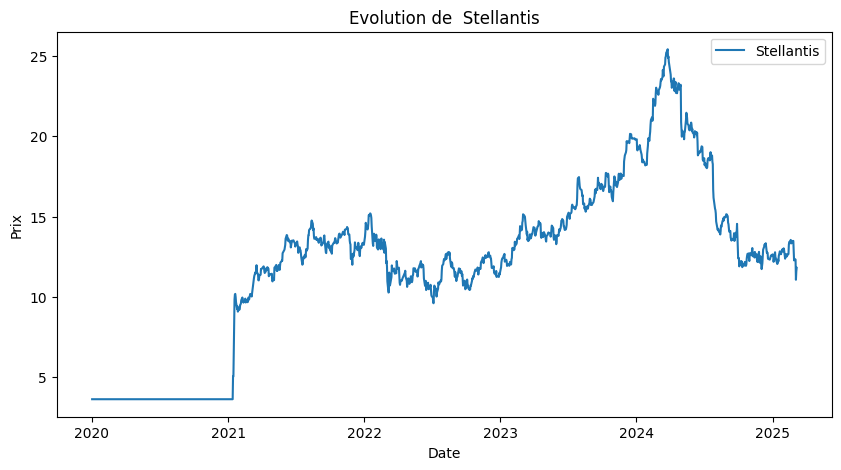

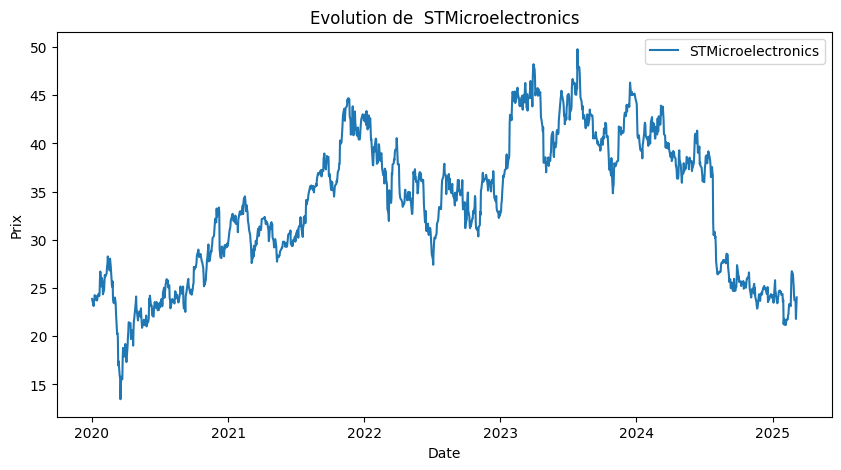

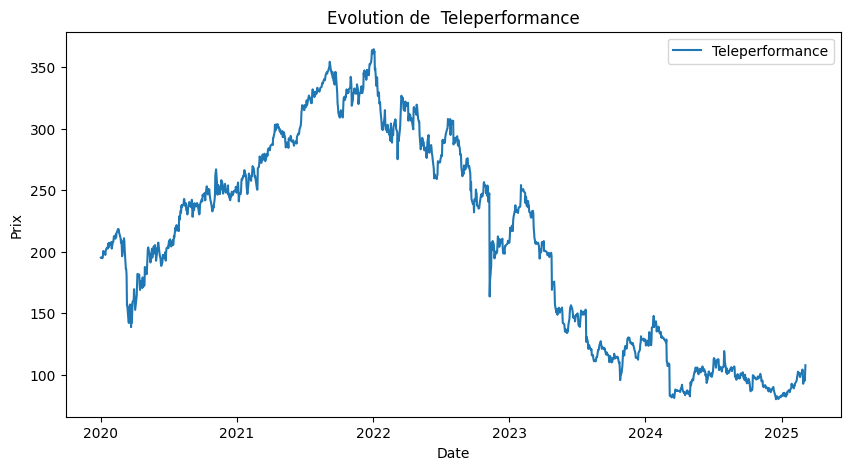

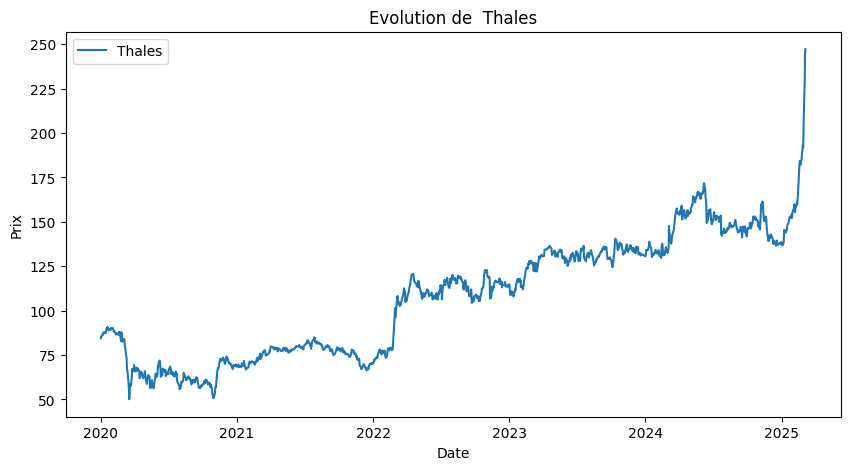

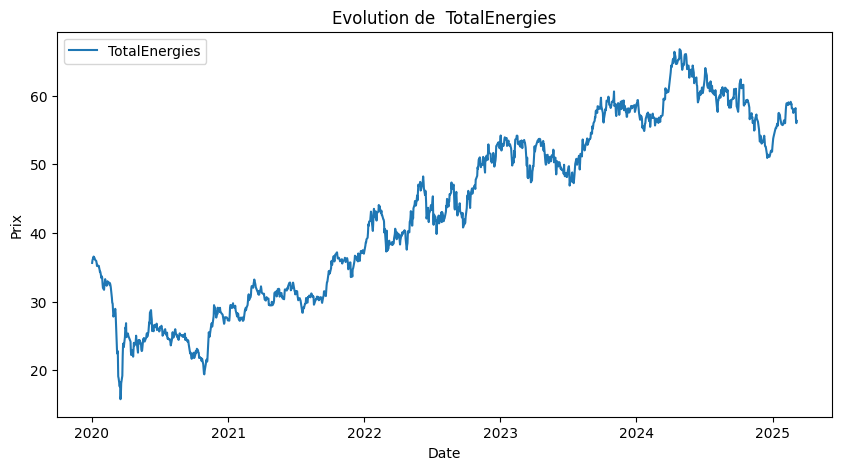

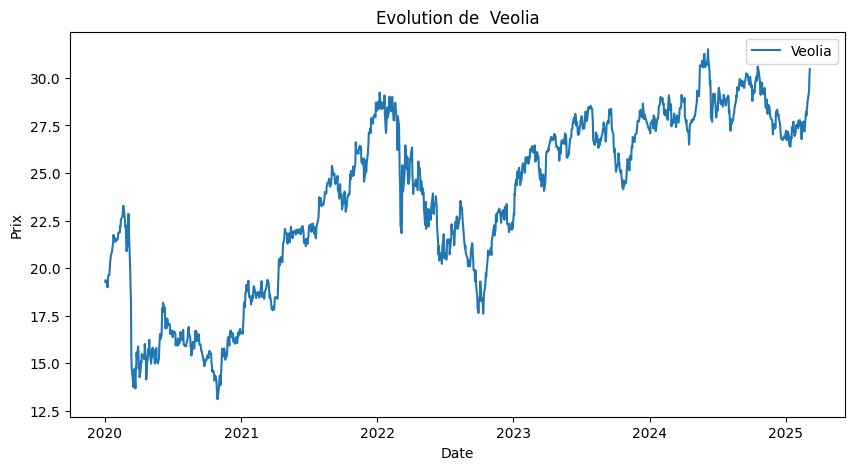

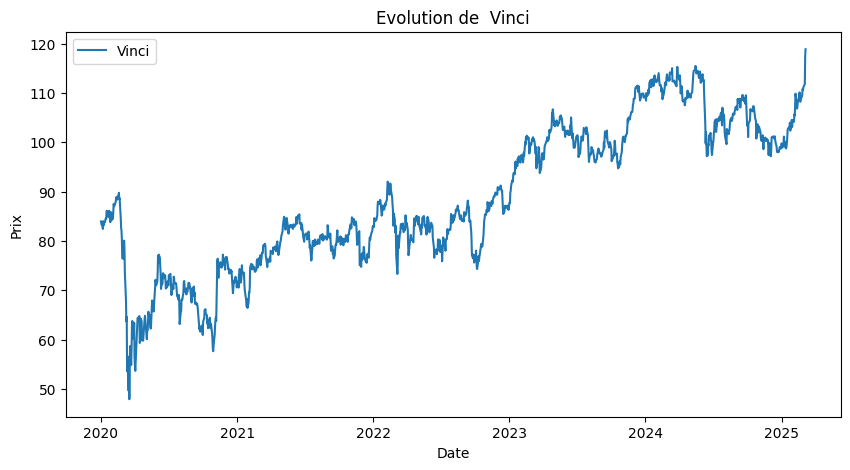

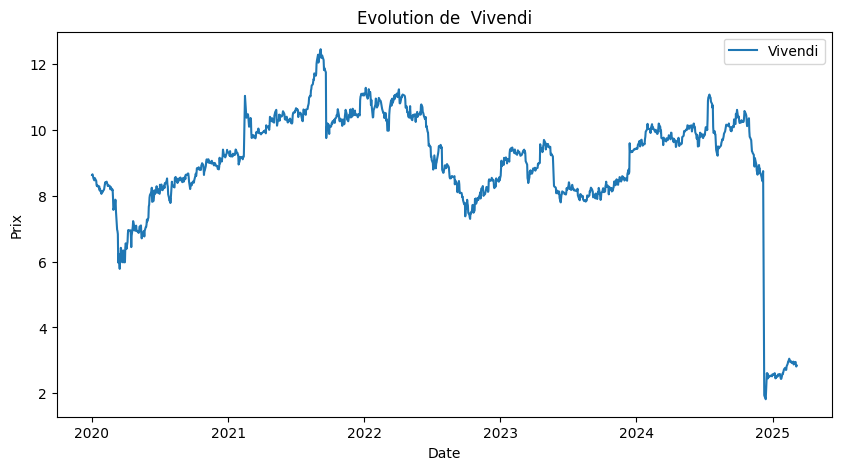

In [7]:

col = info_tickers.iloc[:,0].to_list()
col.remove("URW.PA")
for i in col:
    plt.figure(figsize=(10,5))
    plt.plot(cac40_data[i], label=info_tickers[info_tickers["Ticker"]==i]["Company"].values[0])
    plt.title(f"Evolution de  {info_tickers[info_tickers['Ticker']==i]['Company'].values[0]}")
    plt.xlabel("Date")
    plt.ylabel("Prix")
    plt.legend()
    plt.show()
    

In [8]:
# Les rendements des actifs
returns = cac40_data.pct_change()
returns.dropna(inplace=True)
print(f"Description du rendements des actifs \n {returns.describe().T}")

Description du rendements des actifs 
            count      mean       std       min       25%       50%       75%  \
Ticker                                                                         
AC.PA     1328.0  0.000389  0.023301 -0.135104 -0.010369  0.000591  0.010570   
ACA.PA    1328.0  0.000618  0.020128 -0.168638 -0.008232  0.001648  0.009341   
AI.PA     1328.0  0.000573  0.013437 -0.111603 -0.006105  0.000714  0.007189   
AIR.PA    1328.0  0.000562  0.025919 -0.221685 -0.010151  0.000951  0.010995   
BN.PA     1328.0  0.000176  0.012859 -0.085092 -0.005981  0.000297  0.006425   
BNP.PA    1328.0  0.000804  0.022466 -0.135203 -0.009186  0.001117  0.011541   
CA.PA     1328.0  0.000159  0.016898 -0.127434 -0.008471  0.001027  0.008651   
CAP.PA    1328.0  0.000511  0.019577 -0.116034 -0.009453  0.000466  0.010965   
CS.PA     1328.0  0.000679  0.017329 -0.152184 -0.006898  0.000953  0.008317   
DG.PA     1328.0  0.000445  0.019105 -0.170744 -0.007102  0.000728  0.008521   
D

**Analyse de la performance des actions**

*   Performance du point de vue du rendement

In [9]:
# Les 5 actifs les plus performants
mean_returns = returns.mean()
top_5_performing = mean_returns.nlargest(5)
print(f"Les 5 actifs les plus performants : \n")
print(top_5_performing)

Les 5 actifs les plus performants : 

Ticker
STLAP.PA    0.001322
RMS.PA      0.001198
SGO.PA      0.001097
PUB.PA      0.001039
HO.PA       0.000998
dtype: float64


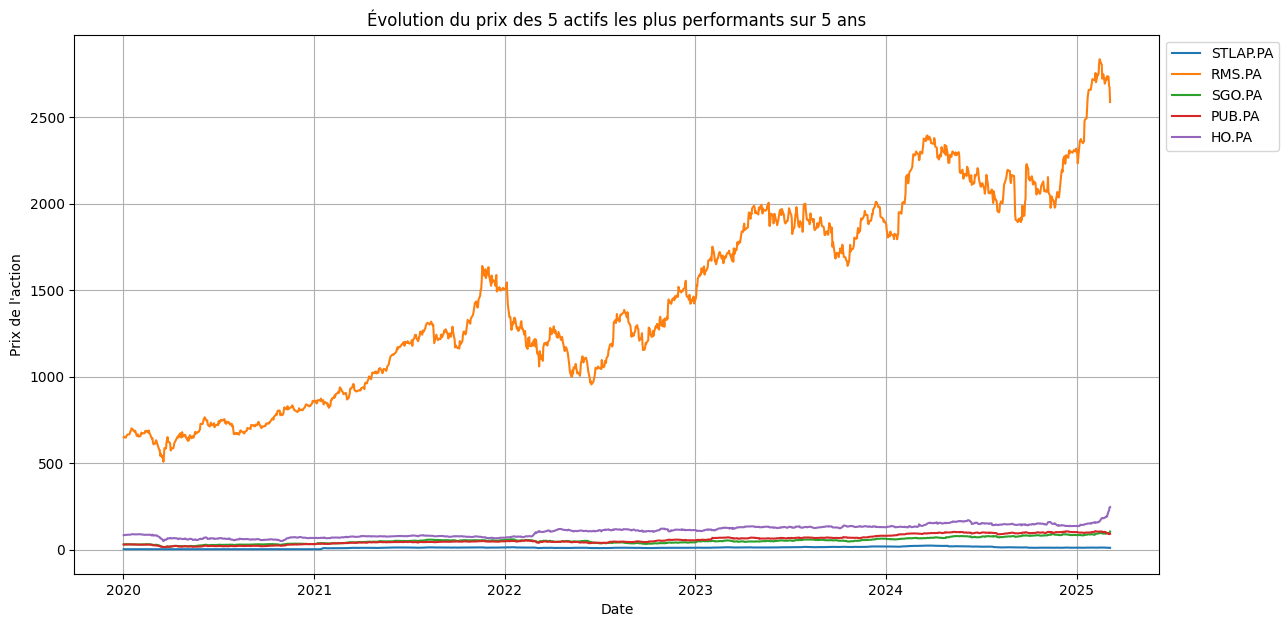

In [10]:
# Visualisation des 5 actifs les plus performants
ticker0 = ['STLAP.PA', 'RMS.PA', 'SGO.PA', 'PUB.PA', 'HO.PA']
top_5_performing_data = cac40_data[ticker0]
plt.figure(figsize=(14, 7))

for i in ticker0:
    plt.plot(cac40_data.index, cac40_data[i],label=i)

plt.title("Évolution du prix des 5 actifs les plus performants sur 5 ans")
plt.xlabel("Date")
plt.ylabel("Prix de l'action")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [11]:
# Les 5 actifs les moins performants
bottom_5_performing = mean_returns.nsmallest(5)
print(f"Les 5 actifs les moins performants : \n")
print(bottom_5_performing)

Les 5 actifs les moins performants : 

Ticker
KER.PA    -0.000295
RI.PA     -0.000124
VIV.PA    -0.000096
TEP.PA    -0.000084
EDEN.PA    0.000033
dtype: float64


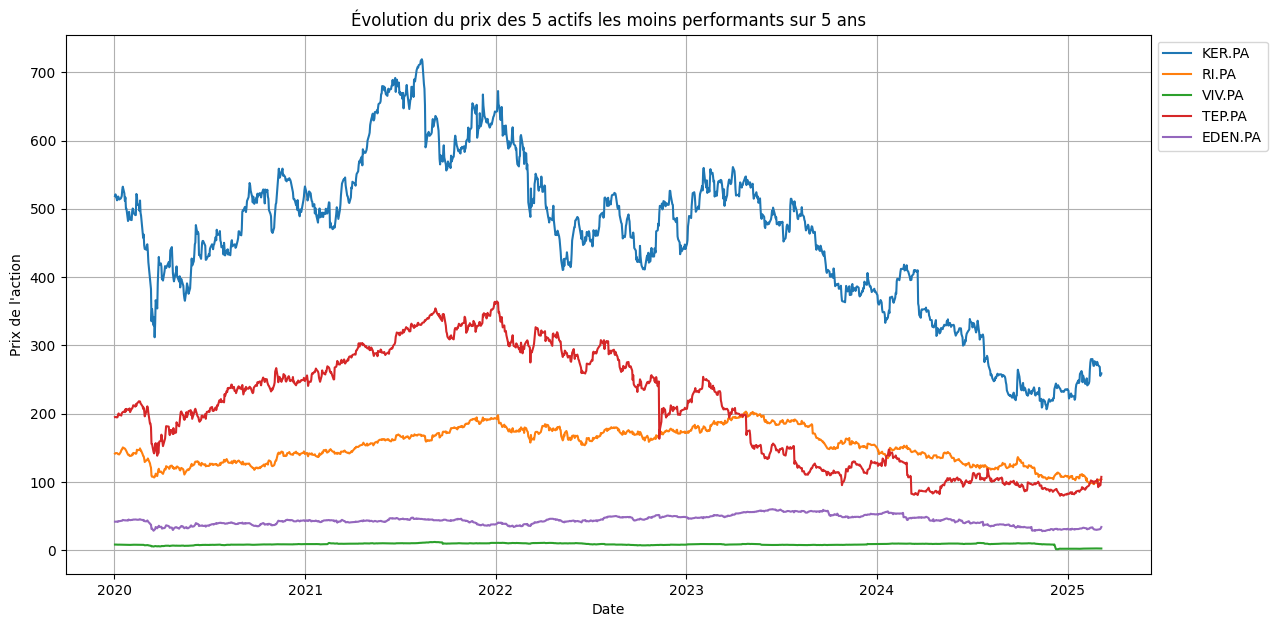

In [12]:
# Les 5 actifs les moins performants
ticker1 = bottom_5_performing.index
plt.figure(figsize=(14, 7))

for j in ticker1:
    plt.plot(cac40_data.index, cac40_data[j],label=j)

plt.title("Évolution du prix des 5 actifs les moins performants sur 5 ans")
plt.xlabel("Date")
plt.ylabel("Prix de l'action")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

*   Performence du point de vue du risque

In [13]:
# Volatilité des actifs
volatility = returns.std()

# Les 5 actifs les plus volatils
top_5_least_volatile = volatility.nsmallest(5)
print(f"Les 5 actifs les moins volatils : \n {top_5_least_volatile}")

# Les 5 actifs les plus volatils
top_5_most_volatile = volatility.nlargest(5)
print(f"\n Les 5 actifs les plus volatils : \n {top_5_most_volatile}")

Les 5 actifs les moins volatils : 
 Ticker
ORA.PA    0.012179
BN.PA     0.012859
AI.PA     0.013437
SAN.PA    0.014308
RI.PA     0.014699
dtype: float64

 Les 5 actifs les plus volatils : 
 Ticker
STLAP.PA    0.033769
VIV.PA      0.029518
RNO.PA      0.029206
MT.AS       0.027937
GLE.PA      0.026642
dtype: float64


**3. Analyse de corrélation des actifs**

Text(0.5, 1.0, 'Carte thermique de la corrélation entre les actifs')

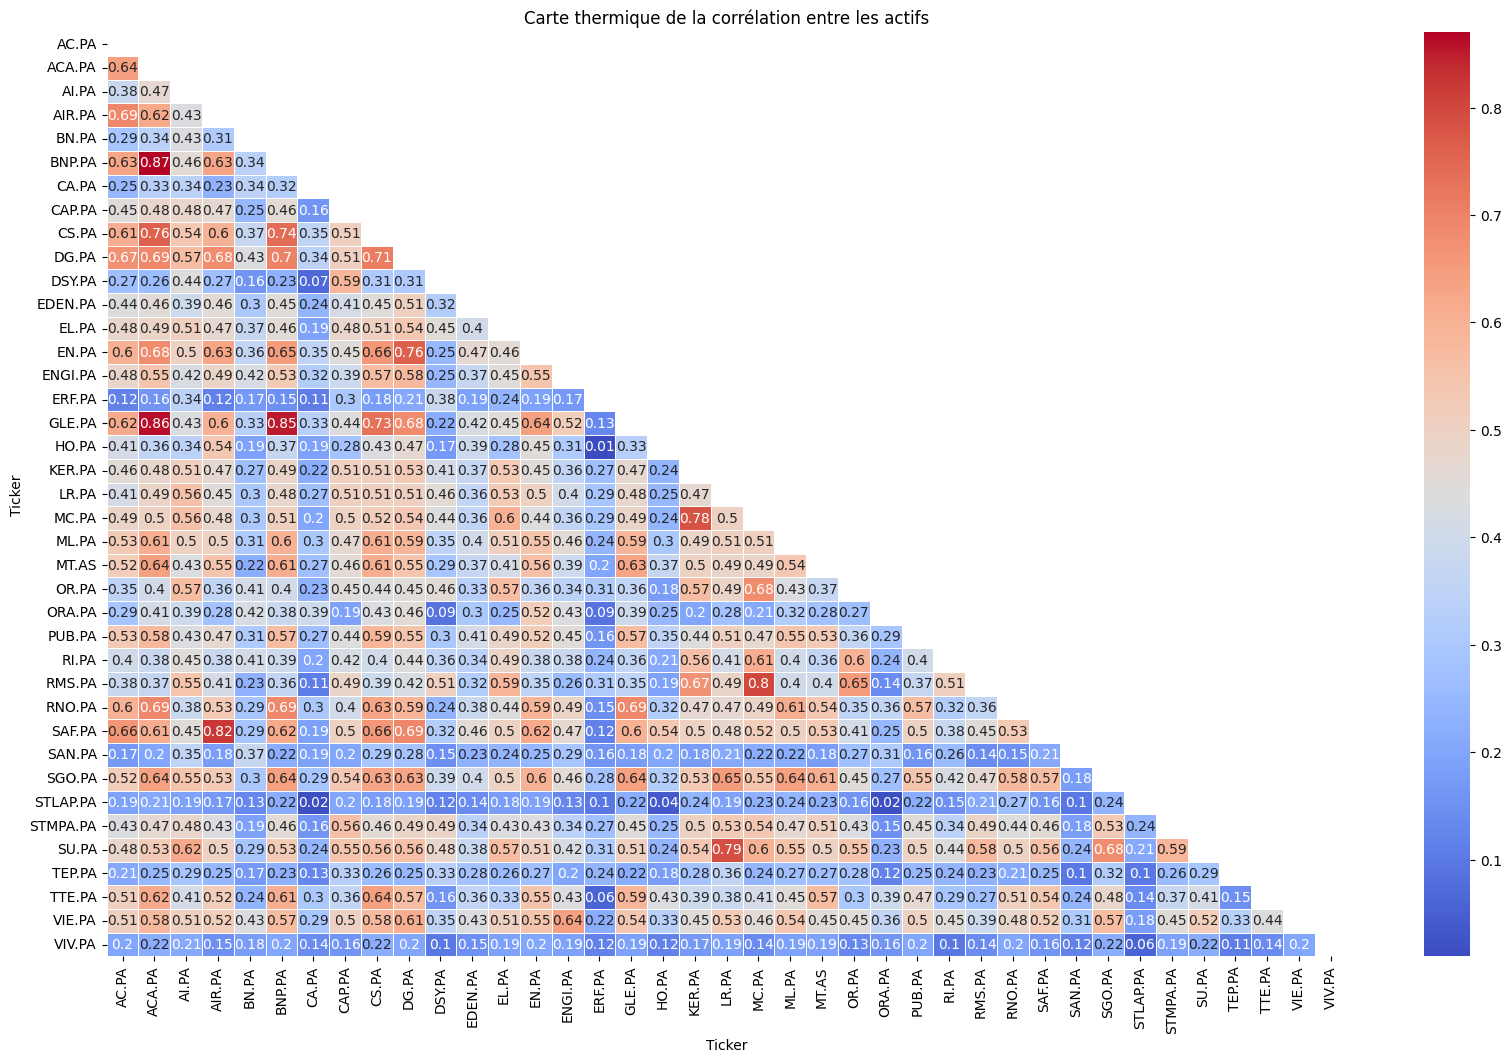

In [14]:
# Corrélation entre les actifs
r2 = np.round(returns.corr(),2)
# Carte thermique
mask =np.triu(np.ones(r2.shape, dtype=bool))
plt.figure(figsize=(20,12))
sns.heatmap(r2,cmap="coolwarm", linewidths=0.5, annot=True, mask=mask)
plt.title("Carte thermique de la corrélation entre les actifs")

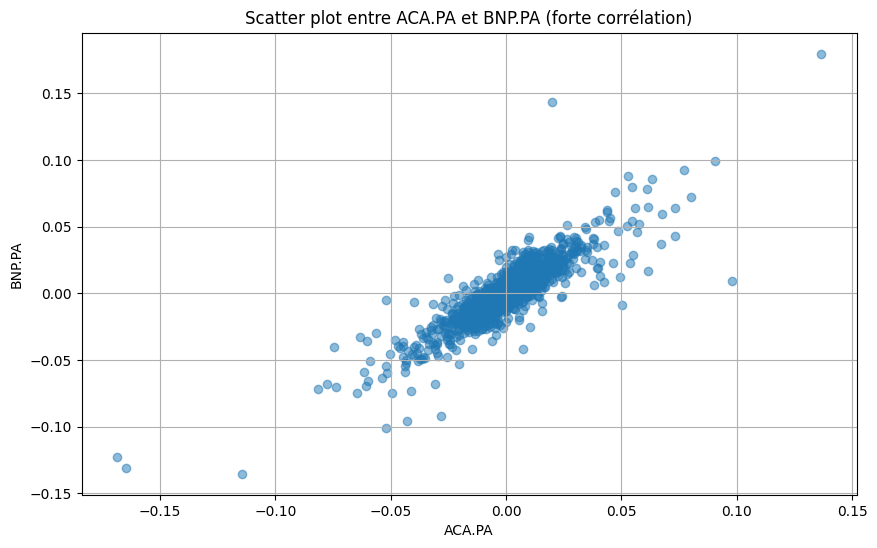

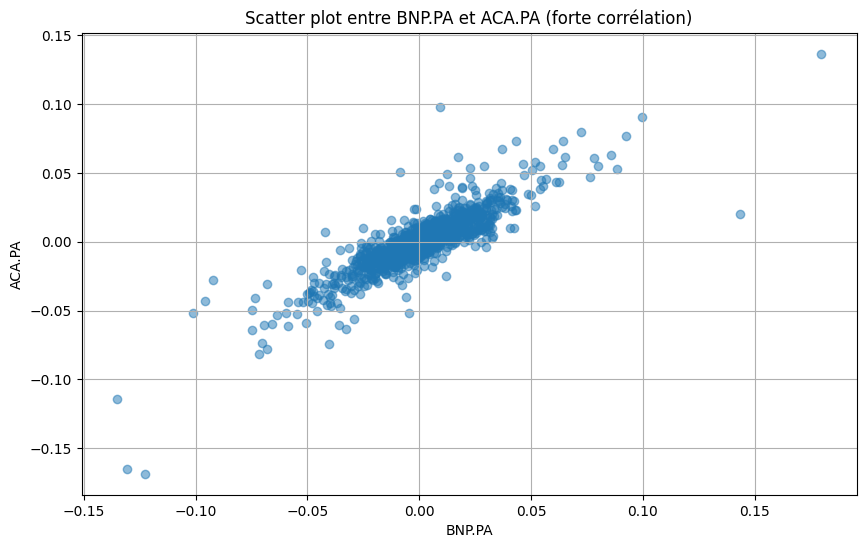

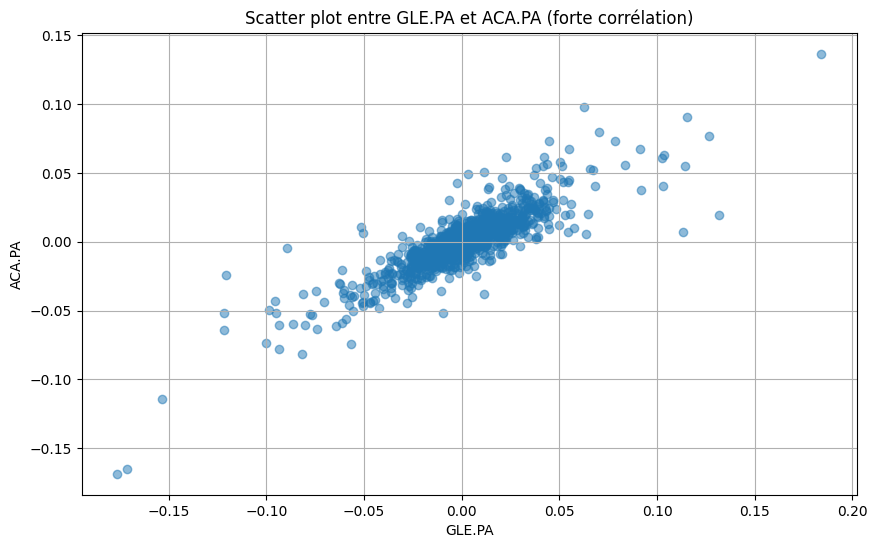

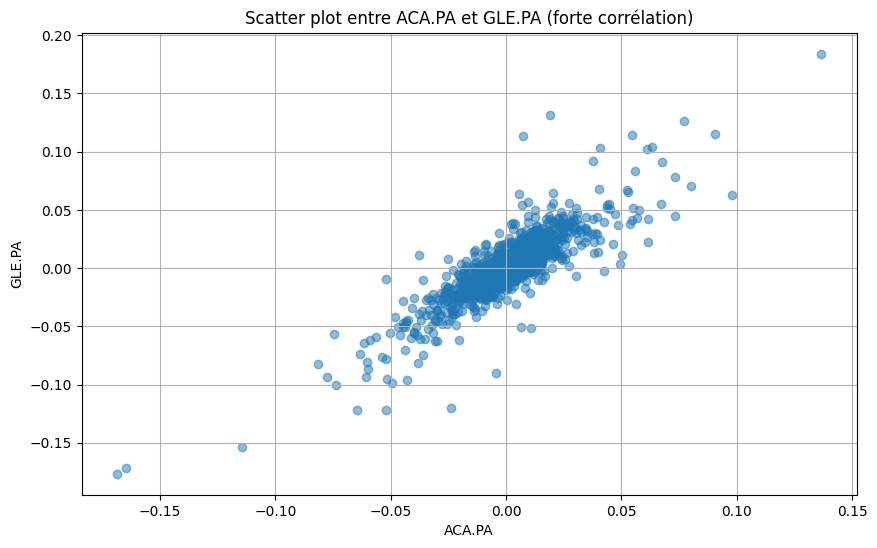

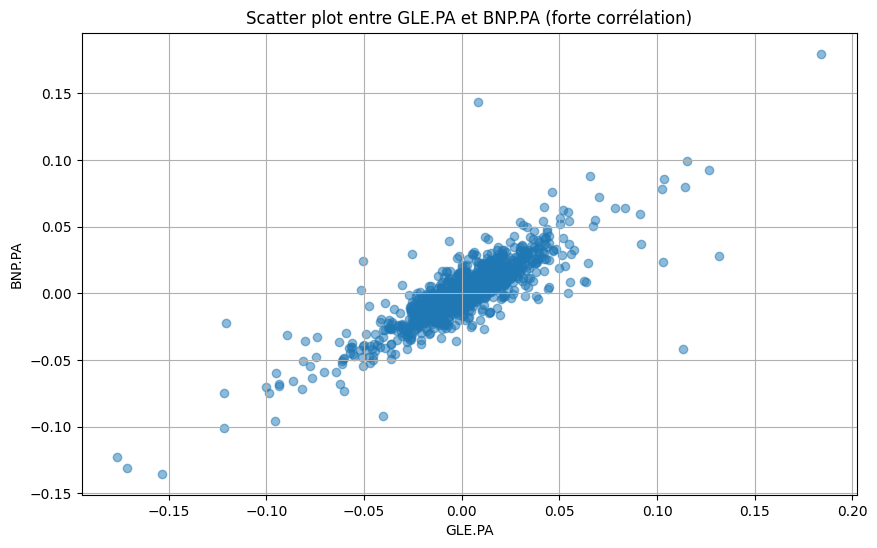

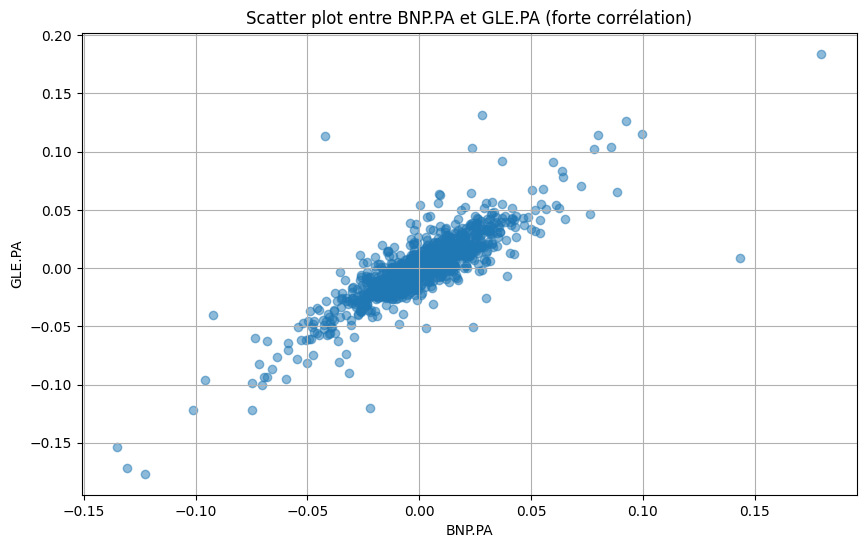

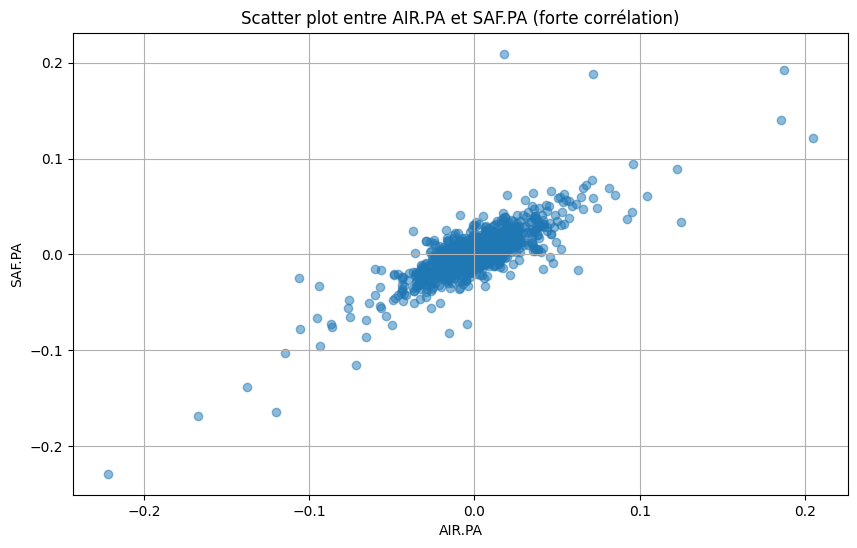

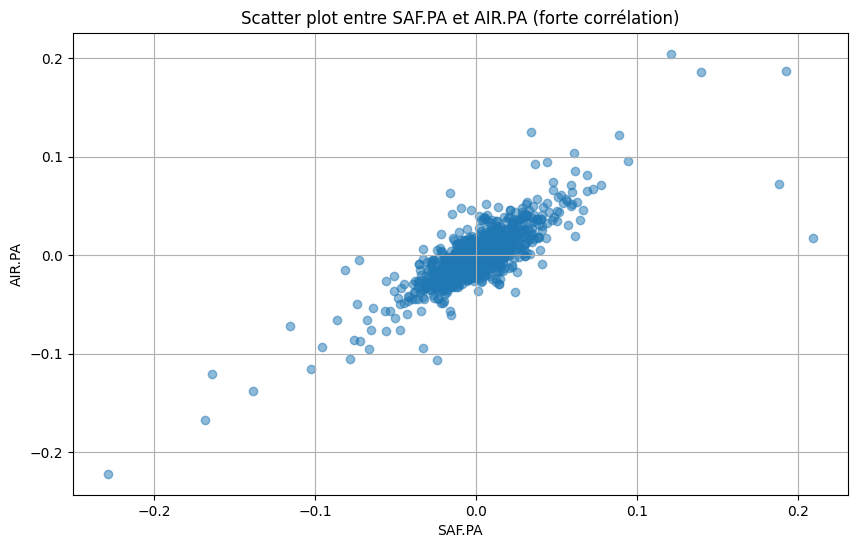

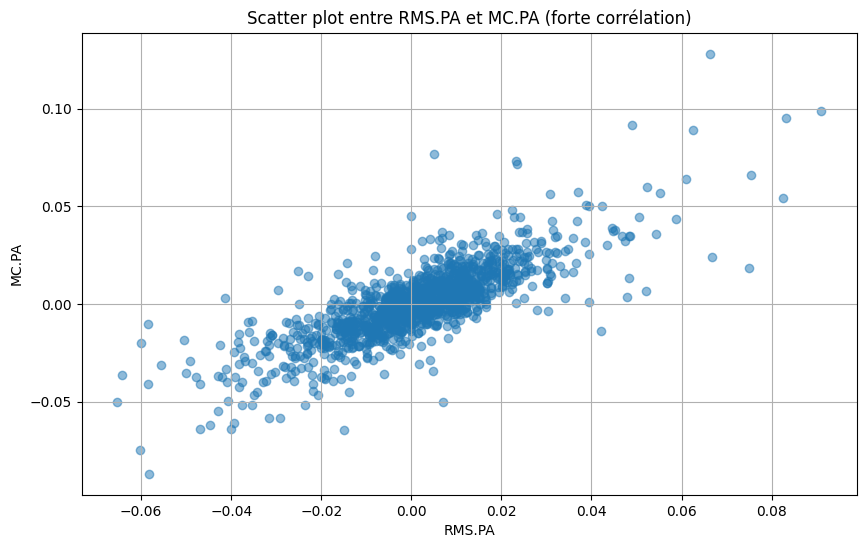

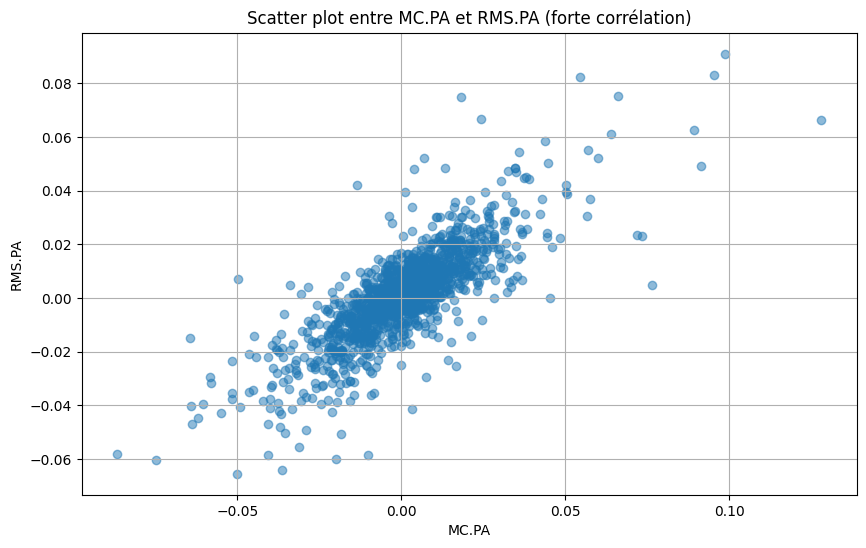

In [15]:
# Trouver les paires d'actifs les plus corrélés
correlation_pairs = r2.unstack().sort_values(kind="quicksort", ascending=False)
# Supprimer les paires avec une corrélation de 1 (corrélation d'un actif avec lui-même)
correlation_pairs = correlation_pairs[correlation_pairs < 1]

# Sélectionner les 5 paires les plus corrélées
top_5_correlated_pairs = correlation_pairs.head(10).index

# Tracer les scatter plots pour les paires les plus corrélées
for pair in top_5_correlated_pairs:
    asset1, asset2 = pair
    plt.figure(figsize=(10, 6))
    plt.scatter(returns[asset1], returns[asset2], alpha=0.5)
    plt.title(f"Scatter plot entre {asset1} et {asset2} (forte corrélation)")
    plt.xlabel(asset1)
    plt.ylabel(asset2)
    plt.grid(True)
    plt.show()

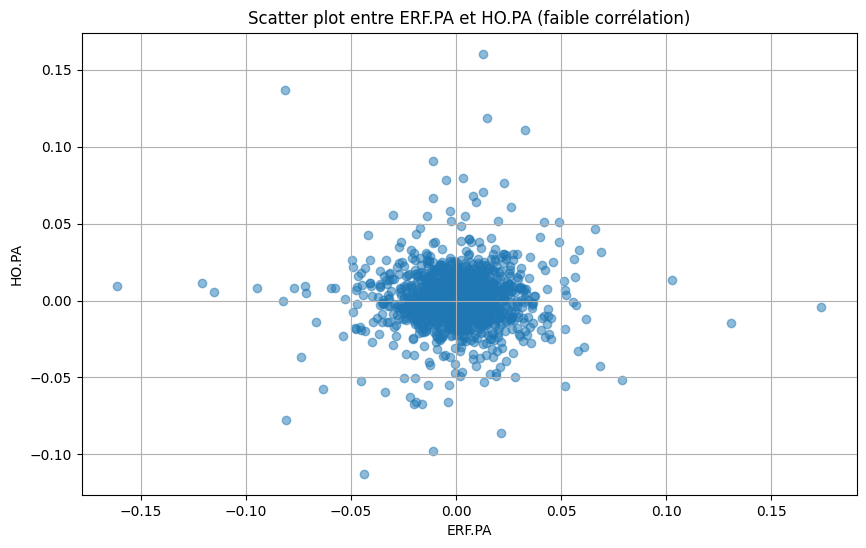

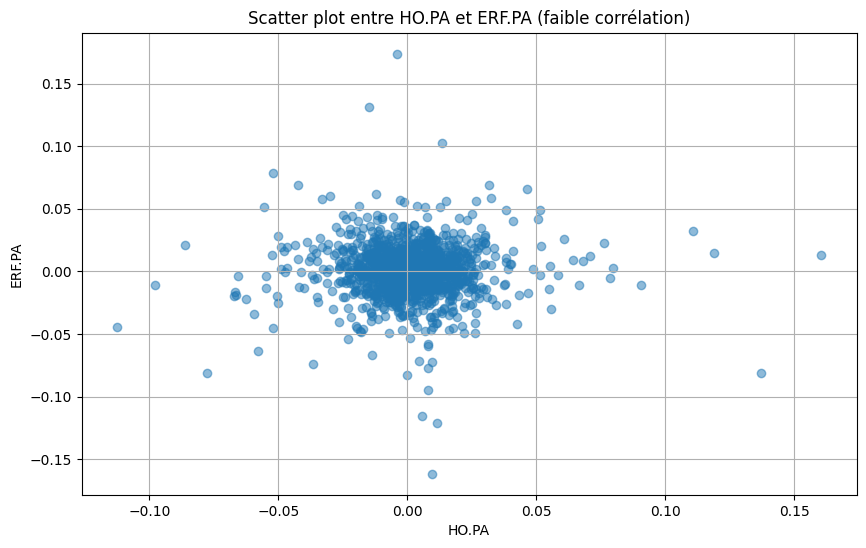

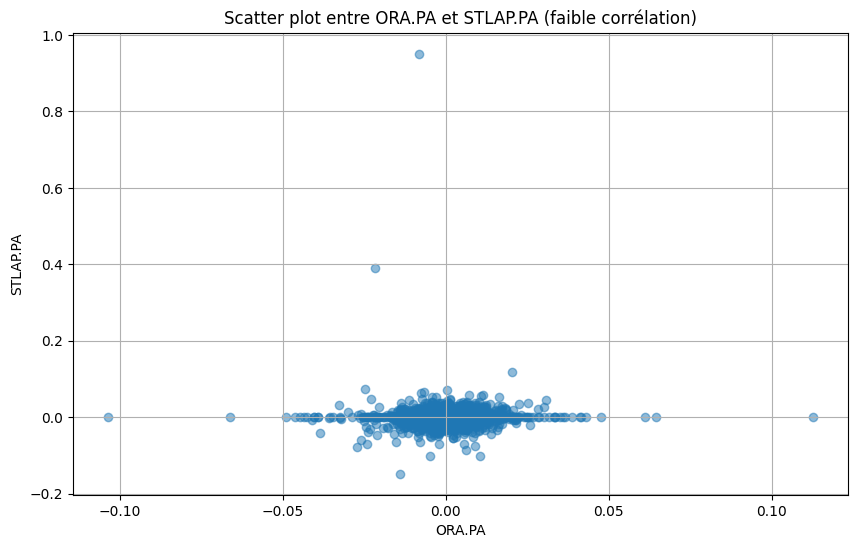

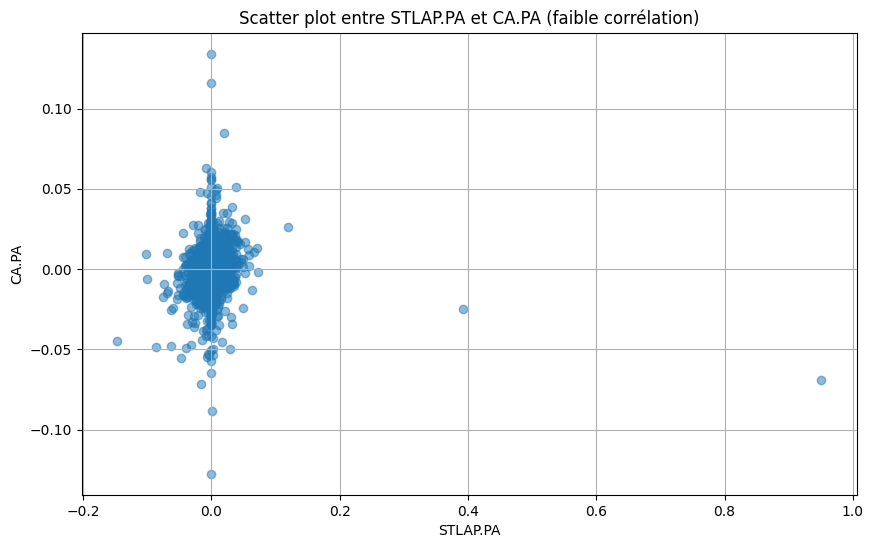

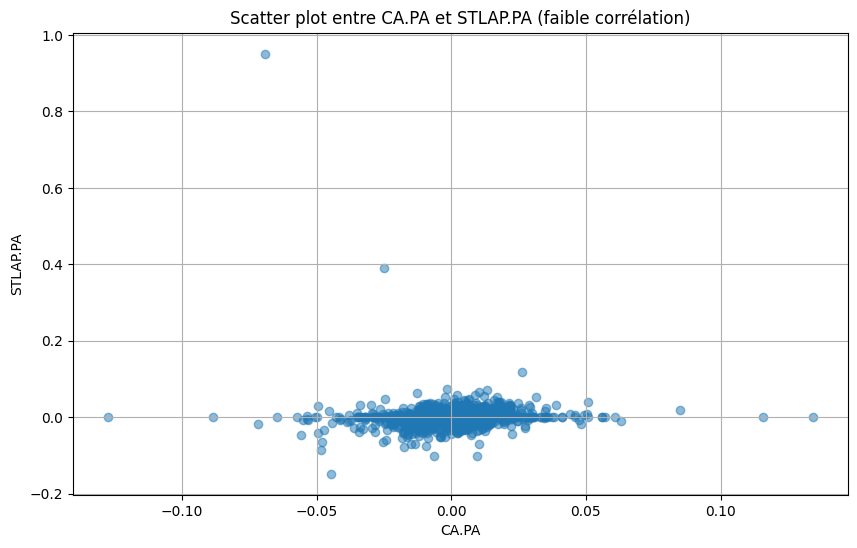

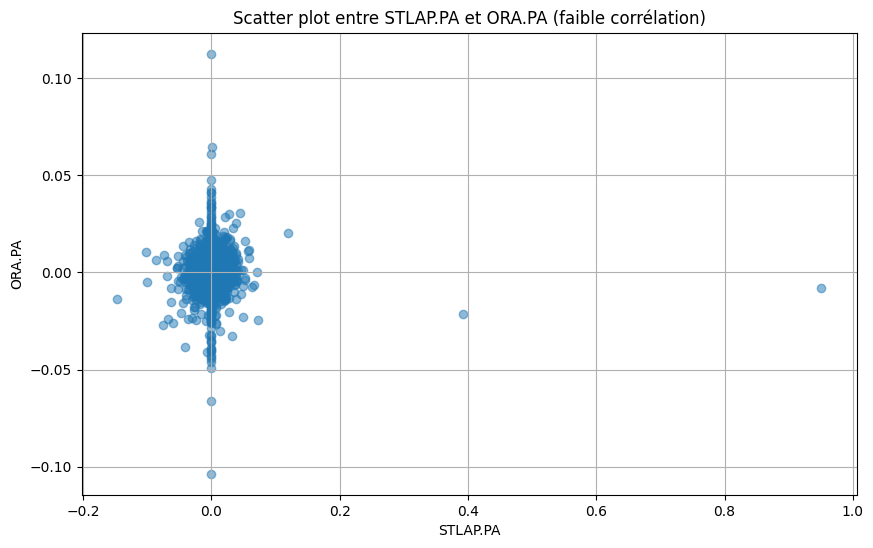

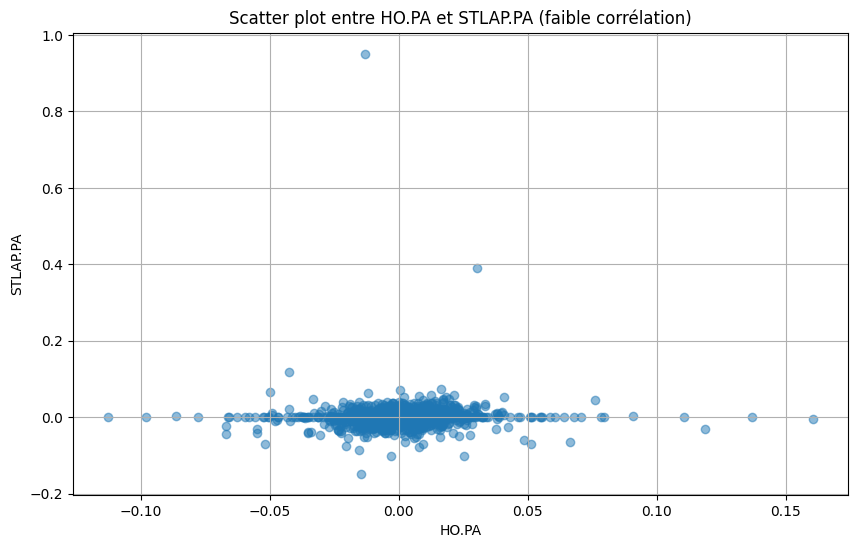

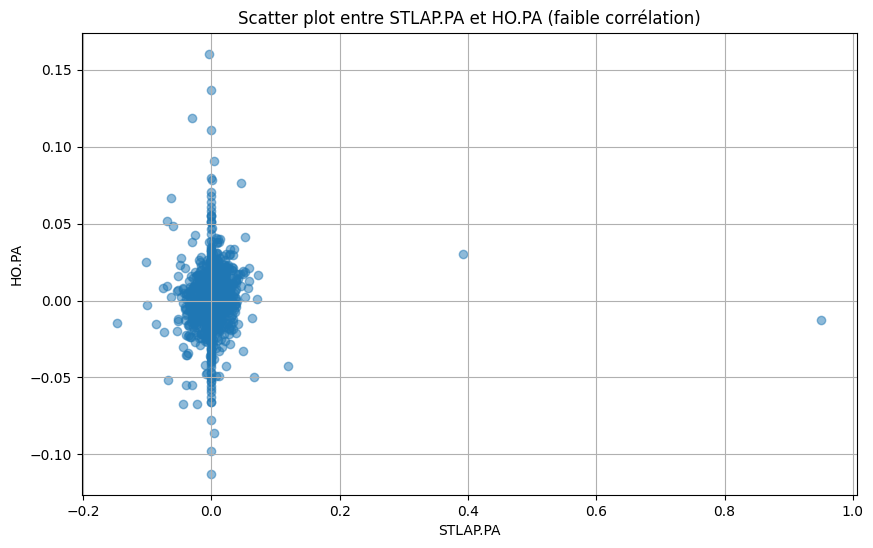

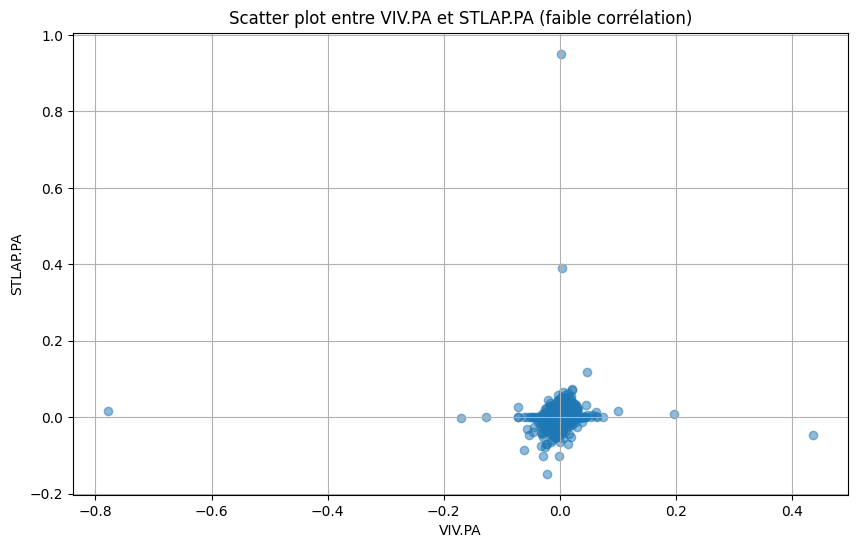

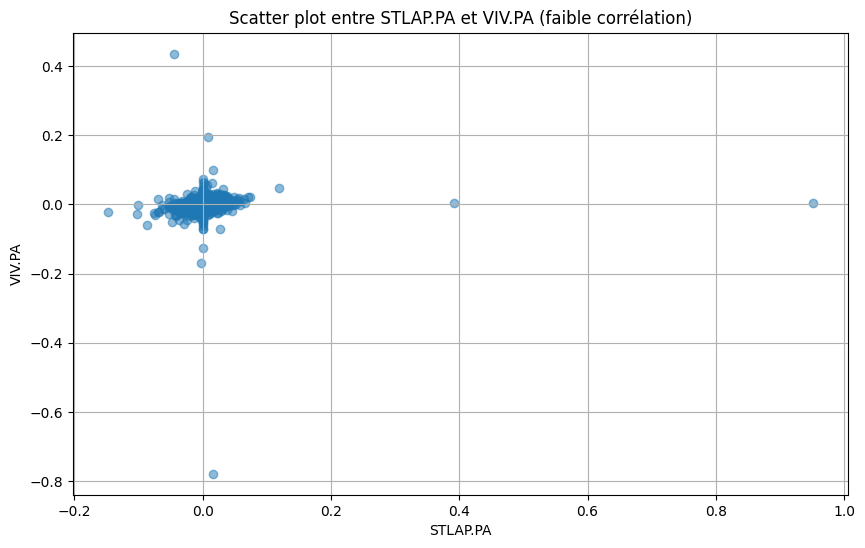

In [16]:
# Trouver les paires d'actifs les moins corrélés
correlation_pairs = r2.unstack().sort_values(kind="quicksort", ascending=True)
# Supprimer les paires avec une corrélation de 1 (corrélation d'un actif avec lui-même)
correlation_pairs = correlation_pairs[correlation_pairs < 1]

# Sélectionner les 5 paires les moins corrélées
bottom_5_correlated_pairs = correlation_pairs.head(10).index

# Tracer les scatter plots pour les paires les moins corrélées
for pair in bottom_5_correlated_pairs:
    asset1, asset2 = pair
    plt.figure(figsize=(10, 6))
    plt.scatter(returns[asset1], returns[asset2], alpha=0.5)
    plt.title(f"Scatter plot entre {asset1} et {asset2} (faible corrélation)")
    plt.xlabel(asset1)
    plt.ylabel(asset2)
    plt.grid(True)
    plt.show()

## **OPTIMISATION DE PORTEFEUILLE - MODELE DE MAKOWITZ**

In [17]:

# Définition des éléments du modèle

## Rendements moyens des actifs
mean_returns = returns.mean()  

## Matrice de covariance des actifs
cov_matrix = returns.cov()     

## Les statistiques du portefeuille où le Taux sans risque = 2%

def portfolio_stats(weights):
    port_return = np.sum(weights * mean_returns) * 252 
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
    sharpe_ratio = (port_return - 0.02) / port_volatility  
    return np.array([port_return, port_volatility, sharpe_ratio])


## La minimisation de la volatilité
def minimize_volatility(weights):
    return portfolio_stats(weights)[1] 


## Détermination des contraintes du modèle
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
bounds = tuple((0, 1) for asset in range(len(mean_returns)))
initial_weights = np.array(len(mean_returns) * [1. / len(mean_returns)])


# Optimisation du portefeuille
optimal = sco.minimize(
    minimize_volatility, 
    initial_weights, 
    method='SLSQP', 
    bounds=bounds, 
    constraints=constraints
)

optimal_weights = optimal.x
print("Poids optimaux du portefeuille : \n \n ", optimal_weights)

Poids optimaux du portefeuille : 
 
  [1.00482961e-17 0.00000000e+00 3.20146766e-17 1.57989486e-17
 1.36358579e-01 1.27246186e-18 7.73120664e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.38919055e-02 5.36916479e-18
 0.00000000e+00 4.82714000e-17 1.59204663e-18 5.57482325e-02
 7.21809934e-18 6.45075868e-02 0.00000000e+00 0.00000000e+00
 1.95759024e-17 0.00000000e+00 0.00000000e+00 2.48268668e-17
 2.66822634e-01 2.50539226e-17 7.60906995e-02 4.19036944e-02
 9.77393345e-18 5.83063088e-18 1.49784864e-01 3.49560853e-17
 2.99606891e-02 0.00000000e+00 4.79732690e-18 8.94870218e-03
 0.00000000e+00 3.41204410e-18 1.86703465e-02]


In [18]:
# Générer les poids optimaux en indexant l'action correspondante
optimal_weights_df = pd.DataFrame({
    'Ticker': mean_returns.index,
    'Optimal Weight': np.round(optimal_weights,3)
})

# Le portefeuille optimal
portefeuille_optimal = pd.merge(info_tickers, optimal_weights_df, on="Ticker")
portefeuille_optimal = portefeuille_optimal[portefeuille_optimal["Optimal Weight"]!=0]
print(f"\n Le portefeuille optimal est : \n \n {portefeuille_optimal.sort_values(by= 'Optimal Weight', ascending=False)}")

# Les statistiques du portefeuille optimal
print(f"\n Avec un rendement de {portfolio_stats(optimal_weights)[0]:.2%}\n ")
print(f"Une volatilité de {portfolio_stats(optimal_weights)[1]:.2%} \n ")
print(f"Un ratio de Sharpe de {portfolio_stats(optimal_weights)[2]:.2f}")


 Le portefeuille optimal est : 
 
       Ticker              Company                  Sector  Optimal Weight
22    ORA.PA               Orange  Communication Services           0.267
28    SAN.PA               Sanofi              Healthcare           0.150
10     BN.PA               Danone      Consumer Defensive           0.136
8      CA.PA            Carrefour      Consumer Defensive           0.077
23     RI.PA        Pernod Ricard      Consumer Defensive           0.076
11    DSY.PA    Dassault Systèmes              Technology           0.074
34     HO.PA               Thales             Industrials           0.065
15    ERF.PA  Eurofins Scientific              Healthcare           0.056
16    RMS.PA               Hermès       Consumer Cyclical           0.042
31  STLAP.PA           Stellantis       Consumer Cyclical           0.030
38    VIV.PA              Vivendi  Communication Services           0.019
33    TEP.PA      Teleperformance  Communication Services           0.009

 

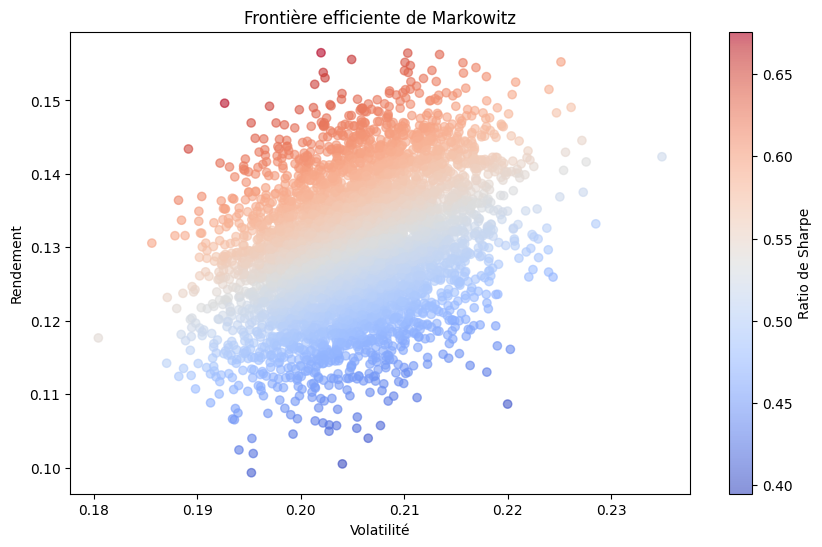

In [19]:
# Simuler plusieurs portefeuilles aléatoires
num_portfolios = 5000
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(mean_returns))
    weights /= np.sum(weights)
    weights_record.append(weights)

    port_return, port_volatility, sharpe = portfolio_stats(weights)
    results[0, i] = port_return
    results[1, i] = port_volatility
    results[2, i] = sharpe

# Tracer la frontière efficiente
plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='coolwarm', alpha=0.6)
plt.xlabel('Volatilité')
plt.ylabel('Rendement')
plt.colorbar(label="Ratio de Sharpe")
plt.title('Frontière efficiente de Markowitz')
plt.show()

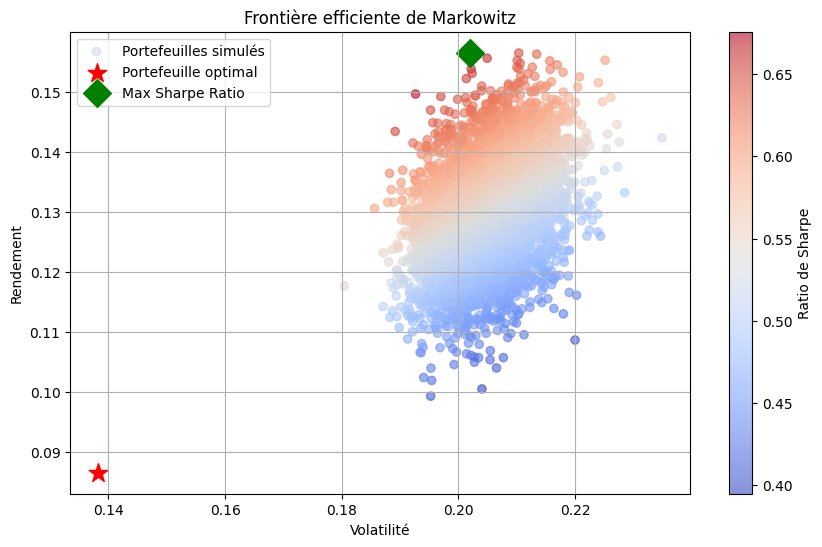

In [20]:
# Calculer les statistiques du portefeuille optimal
optimal_return, optimal_volatility, optimal_sharpe = portfolio_stats(optimal_weights)

# Trouver le portefeuille avec le ratio de Sharpe le plus élevé
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]

# Tracer la frontière efficiente avec des améliorations
plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='coolwarm', alpha=0.6, label='Portefeuilles simulés')
plt.colorbar(label="Ratio de Sharpe")
plt.scatter(optimal_volatility, optimal_return, marker='*', color='r', s=200, label='Portefeuille optimal')
plt.scatter(max_sharpe_volatility, max_sharpe_return, marker='D', color='g', s=200, label='Max Sharpe Ratio')
plt.xlabel('Volatilité')
plt.ylabel('Rendement')
plt.title('Frontière efficiente de Markowitz')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## **SUIVI DU PORTEFEUILLE D'INVESTISSEMENT** 

L'objectif ici  c'est de suivre le porfeteuille optimal compte tenu des facteurs de fluctuation de l'activité économique et du marché.

*   ***Fonction de performance***

In [ ]:
# Fonction de performance
def check_performance():
    # 📌 Recalcul des rendements et de la covariance sur une fenêtre de 30 jours
    rolling_weights = []
    rolling_portfolio_returns = pd.Series(index=returns.index)
    window_size = 30  # Rééquilibrage mensuel

    for i in range(window_size, len(returns), window_size):
        rolling_period = returns.iloc[i - window_size:i]  # Fenêtre des 30 derniers jours
        
        # Recalcul des rendements moyens et de la covariance
        mean_returns_rolling = rolling_period.mean()
        cov_matrix_rolling = rolling_period.cov()
        
        # Nouvelle optimisation de Markowitz avec les données récentes
        new_optimal = sco.minimize(
            minimize_volatility, 
            initial_weights, 
            method='SLSQP', 
            bounds=bounds, 
            constraints=constraints
        )
        
        new_weights = new_optimal.x
        rolling_weights.append(new_weights)

    def send_mail():
        import smtplib
        server = smtplib.SMTP_SSL('smtp.gmail.com',465)
        server.ehlo()
            #server.starttls()
        server.ehlo()
        server.login('abdoulayetangara722@gmail.com','xxxxxxxxxxxxxx')
            
        subject = "Nouveau portefeuille optimal ! "
        body = "Hello ! Ablo, voici le nouveau portefeuille optimal : \n"
        body += f"Le rendement est de {portfolio_stats(new_weights)[0]:.2%}\n" 
        body += f"La volatilité est de {portfolio_stats(new_weights)[1]:.2%}\n"
        body += f"Le ratio de Sharpe est de {portfolio_stats(new_weights)[2]:.2f}"
            
        msg = f"Subject: {subject}\n\n{body}"
            
        server.sendmail(
            'abdoulayetangara722@gmail.com',
            msg)
        server.quit()
        print("Email envoyé avec succès !")

        send_mail()
    return new_weights, mean_returns_rolling

*   ***Fonction de nouvelle optimisation***

In [ ]:
# Fonction de nouvelle optimisation
def optimal_portfolio_func(weights, mean_returns):
    new_weights = weights
    def portfolio_stats(new_weights):
        port_return = np.sum(new_weights * mean_returns) * 252 
        port_volatility = np.sqrt(np.dot(new_weights.T, np.dot(cov_matrix * 252, new_weights)))
        sharpe_ratio = (port_return - 0.02) / port_volatility  
        return np.array([port_return, port_volatility, sharpe_ratio])

    
    ## La minimisation de la volatilité
    def minimize_volatility(new_weights):
        return portfolio_stats(new_weights)[1] 


    ## Détermination des contraintes du modèle
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds = tuple((0, 1) for asset in range(len(mean_returns)))
    initial_weights = np.array(len(mean_returns) * [1. / len(mean_returns)])


    # Optimisation du portefeuille
    optimal = sco.minimize(
        minimize_volatility, 
        initial_weights, 
        method='SLSQP', 
        bounds=bounds, 
        constraints=constraints
    )

    new_optimal_weights = optimal.x
    optimal_weights_df = pd.DataFrame({
    'Ticker': mean_returns.index,
    'Optimal Weight': np.round(optimal_weights,3)
    })
    rendement = f"Avec un rendement de {portfolio_stats(new_optimal_weights)[0]:.2%}"
    volatilite = f"Une volatilité de {portfolio_stats(new_optimal_weights)[1]:.2%}"
    ratio_sharpe = f"Un ratio de Sharpe de {portfolio_stats(new_optimal_weights)[2]:.2f}"

    
    print("🔄 Mise à jour mensuelle des poids du portefeuille !")
    return (optimal_weights_df, rendement, volatilite, ratio_sharpe)

*   ***Automatisation du processus***

Cette automatisation consiste suivre chaque jour s'il y a une tâche permettant de mettre à jour le portefeuille optimal et chaque 30 jours à calculer le poids optimal des actifs 

In [ ]:
# Exécuter tous les 30 jours
schedule.every(30).days.do(check_performance)
schedule.every(30).days.do(optimal_portfolio_func)
 
# Boucle infinie pour exécuter la tâche planifiée
while True:
    schedule.run_pending()
    time.sleep(86400)  # Vérifier une fois par jour